In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import warnings
warnings.filterwarnings(action='ignore')

I choose the $\textbf{regrssion model}$ as TermProject.

* So, First, open the Regrssion's csv file. And then, see what is our dependent variable and independent variables.


**I put one code (which is not working) at the below (Evaluating Decision Tree area) on purpose** because I want to show you the memory limitation issue


In [4]:
# 파일 읽기
data = pd.read_csv("RoS_train_2019.csv")
data_t = pd.read_csv("RoS_test_2019.csv")
data.head(10)

,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,year
0,5571,560,1,1,0,1,c,a,1270,9.0,2008.0,0,NaN,NaN,NaN,7,15
1,6714,612,1,1,0,1,c,a,1270,9.0,2008.0,0,NaN,NaN,NaN,7,15
2,5371,519,1,1,0,0,c,a,1270,9.0,2008.0,0,NaN,NaN,NaN,7,15
3,4257,449,1,0,0,0,c,a,1270,9.0,2008.0,0,NaN,NaN,NaN,7,15
4,4209,447,1,0,0,0,c,a,1270,9.0,2008.0,0,NaN,NaN,NaN,6,15
5,4689,487,1,1,0,0,c,a,1270,9.0,2008.0,0,NaN,NaN,NaN,6,15
6,6104,586,1,1,0,0,c,a,1270,9.0,2008.0,0,NaN,NaN,NaN,6,15
7,4587,485,1,0,0,0,c,a,1270,9.0,2008.0,0,NaN,NaN,NaN,6,15
8,4643,460,1,0,0,0,c,a,1270,9.0,2008.0,0,NaN,NaN,NaN,6,15
9,6040,590,1,1,0,0,c,a,1270,9.0,2008.0,0,NaN,NaN,NaN,6,15


###  Data variable explaination

- **Id** - an Id that represents a (Store, Date) duple within the test set
- **Store** - a unique Id for each store
- **Sales** - the turnover for any given day (this is what you are predicting)
- **Customers** - the number of customers on a given day
- **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
- **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
- **StoreType** - differentiates between 4 different store models: a, b, c, d
- **Assortment** - describes an assortment level: a = basic, b = extra, c = extended
- **CompetitionDistance** - distance in meters to the nearest competitor store
- **CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
- **Promo** - indicates whether a store is running a promo on that day
- **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = - store is participating
- **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
- **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Main Purpose
* From the independent varialbes, we want to predict the Sales.
* What is the meaningful value of independent value? (how importantly affect the Sales depending on independent variables X)
* How can we handle the non-numeric variables? (how can we transform in order to interpret as regression)
* How can we interpret the result? 

## My first hypothesis
* 1) **Sales** will be very closely relationship with seasonal date (such as **holiday, weekend **) 
 - therefore, in order to analyize this, we have to modify "Date" variable into any specific form that we can handle.
* 2)  **Sales** will also be very closely relationship with number of customers.



#### (Just option) change the order
* since, $\textbf{(Sales)}$ is our depedent variable $\rightarrow$ I change the order at the rightmost side.

In [5]:
# 맨 오른쪽으로 sales 빼기
K = data["Sales"]
data = data.iloc[:,1:]
data["Sales"] = K
data

,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,year,Sales
0,560,1,1,0,1,c,a,1270,9.0,2008.0,0,NaN,NaN,NaN,7,15,5571
1,612,1,1,0,1,c,a,1270,9.0,2008.0,0,NaN,NaN,NaN,7,15,6714
2,519,1,1,0,0,c,a,1270,9.0,2008.0,0,NaN,NaN,NaN,7,15,5371
3,449,1,0,0,0,c,a,1270,9.0,2008.0,0,NaN,NaN,NaN,7,15,4257
4,447,1,0,0,0,c,a,1270,9.0,2008.0,0,NaN,NaN,NaN,6,15,4209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14990,694,1,0,0,0,d,a,17930,NaN,NaN,0,NaN,NaN,NaN,1,13,7730
14991,743,1,0,0,0,d,a,17930,NaN,NaN,0,NaN,NaN,NaN,1,13,9224
14992,389,1,0,0,0,d,a,17930,NaN,NaN,0,NaN,NaN,NaN,1,13,4559
14993,453,1,0,0,0,d,a,17930,NaN,NaN,0,NaN,NaN,NaN,1,13,5702


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14995 entries, 0 to 14994
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customers                  14995 non-null  int64  
 1   Open                       14995 non-null  int64  
 2   Promo                      14995 non-null  int64  
 3   StateHoliday               14995 non-null  object 
 4   SchoolHoliday              14995 non-null  int64  
 5   StoreType                  14995 non-null  object 
 6   Assortment                 14995 non-null  object 
 7   CompetitionDistance        14995 non-null  int64  
 8   CompetitionOpenSinceMonth  10797 non-null  float64
 9   CompetitionOpenSinceYear   10797 non-null  float64
 10  Promo2                     14995 non-null  int64  
 11  Promo2SinceWeek            7911 non-null   float64
 12  Promo2SinceYear            7911 non-null   float64
 13  PromoInterval              7911 non-null   obj

In [7]:
data.isnull().sum()

Customers                       0
Open                            0
Promo                           0
StateHoliday                    0
SchoolHoliday                   0
StoreType                       0
Assortment                      0
CompetitionDistance             0
CompetitionOpenSinceMonth    4198
CompetitionOpenSinceYear     4198
Promo2                          0
Promo2SinceWeek              7084
Promo2SinceYear              7084
PromoInterval                7084
month                           0
year                            0
Sales                           0
dtype: int64

In [8]:
data.columns.unique()

Index(['Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'month', 'year',
       'Sales'],
      dtype='object')

### Drop indexes

Almost half of the data are NaN
- **Promo2SinceWeek**
- **Promo2SinceYear**
- **PromoInterval**


After option (다하고 난뒤에 추가로 시간남으면 시행)
- **CompetitionOpenSinceMonth**
- **CompetitionOpenSinceYear**

In [9]:
# 필요없는 변수들 삭제
data_1 = data.drop(['Promo2SinceWeek','Promo2SinceYear','PromoInterval','CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis = 1)
data_2 = data.drop(['Promo2SinceWeek','Promo2SinceYear','PromoInterval'], axis = 1)

In [10]:
data_1.isnull().sum()

Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
month                  0
year                   0
Sales                  0
dtype: int64

#### There is no null data when we delete certain independent variables

So, this is the edited data matrix which we will use at this project

In [11]:
data_1

,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,month,year,Sales
0,560,1,1,0,1,c,a,1270,0,7,15,5571
1,612,1,1,0,1,c,a,1270,0,7,15,6714
2,519,1,1,0,0,c,a,1270,0,7,15,5371
3,449,1,0,0,0,c,a,1270,0,7,15,4257
4,447,1,0,0,0,c,a,1270,0,6,15,4209
...,...,...,...,...,...,...,...,...,...,...,...,...
14990,694,1,0,0,0,d,a,17930,0,1,13,7730
14991,743,1,0,0,0,d,a,17930,0,1,13,9224
14992,389,1,0,0,0,d,a,17930,0,1,13,4559
14993,453,1,0,0,0,d,a,17930,0,1,13,5702


### data.describe() and see the histogram
- since, there exist null_data. So, at this point, I just delete immediately (임시적으로), to make the general intuition of each feature.
- If so, we just drop 171 row data.

In [12]:
data_1.describe()

,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,month,year,Sales
count,14995.000000,14995.0,14995.000000,14995.000000,14995.00000,14995.000000,14995.000000,14995.000000,14995.000000
mean,699.999066,1.0,0.447482,0.193865,5544.19073,0.527576,5.842548,13.829010,7390.554518
std,272.567080,0.0,0.497251,0.395337,6982.47137,0.499256,3.322905,0.779368,2844.543954
min,120.000000,1.0,0.000000,0.000000,40.00000,0.000000,1.000000,13.000000,1294.000000
25%,513.000000,1.0,0.000000,0.000000,620.00000,0.000000,3.000000,13.000000,5415.000000
50%,646.000000,1.0,0.000000,0.000000,2370.00000,1.000000,6.000000,14.000000,6963.000000
75%,835.500000,1.0,1.000000,0.000000,7660.00000,1.000000,8.000000,14.000000,8865.500000
max,2614.000000,1.0,1.000000,1.000000,30360.00000,1.000000,12.000000,15.000000,31147.000000


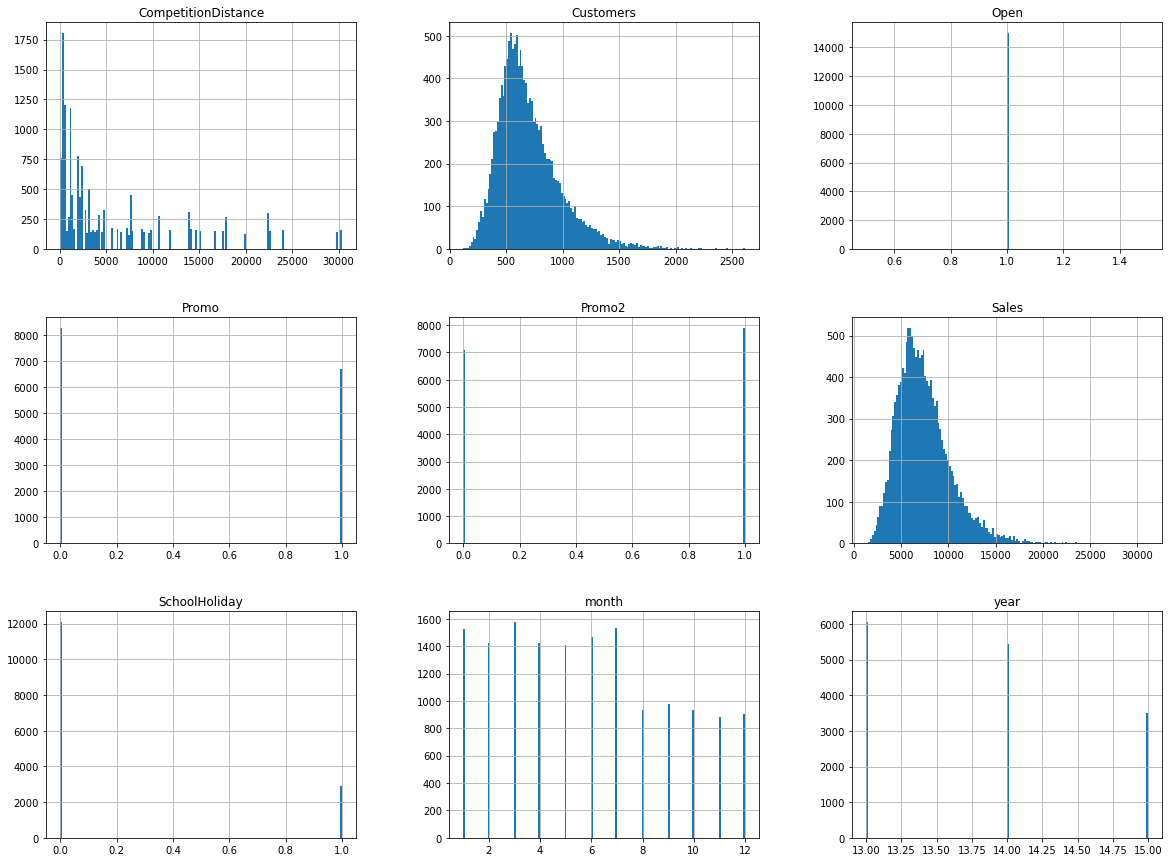

In [13]:
data_1.hist(bins=150, figsize=(20, 15))
plt.show()

## 각 변수의 분포도를 알 수 있다.

## Data EDA 

### Open (should be deleted)

In [14]:
data_1["Open"].value_counts()

1    14995
Name: Open, dtype: int64

In [15]:
## 모든 데이터가 open 이므로, 삭제 가능
data_1.drop(["Open"], axis =1, inplace = True)

### StateHoliday (should be deleted?)

In [16]:
StateHoliday = data_1["StateHoliday"].value_counts()
StateHoliday

0    14986
a        8
b        1
Name: StateHoliday, dtype: int64

<BarContainer object of 3 artists>

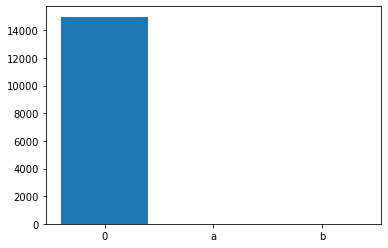

In [17]:
plt.bar(['0','a','b'], [14986,8,1])

In [18]:
data_1[data_1["StateHoliday"]=='0'].sort_values(by = "Sales", ascending = False)

,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,month,year,Sales
8452,2009,1,0,0,d,c,420,0,12,13,31147
12534,2614,0,0,1,a,c,11810,0,12,13,27006
8456,1807,1,0,0,d,c,420,0,12,13,25177
12443,1928,1,0,0,a,c,11810,0,6,15,24577
3545,1534,1,0,0,a,c,4590,1,6,14,23549
...,...,...,...,...,...,...,...,...,...,...,...
12424,164,0,0,0,a,a,2710,0,2,13,1661
698,182,0,0,0,a,a,29910,0,4,14,1605
5955,218,0,0,0,a,a,180,1,2,14,1573
14453,153,0,0,0,a,a,8780,1,2,13,1456


In [19]:
data_1[data_1["StateHoliday"]=='a']

,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,month,year,Sales
741,576,1,a,0,a,a,29910,0,5,13,5641
8049,652,1,a,0,d,c,7170,1,5,13,6545
8078,702,1,a,0,a,a,720,0,6,15,6686
8870,806,1,a,0,d,c,5540,0,6,14,10405
12611,1843,0,a,0,b,a,1870,0,5,15,14861
12614,1643,1,a,0,b,a,1870,0,5,15,13003
12711,603,0,a,1,b,a,1870,0,1,14,4787
14144,884,1,a,0,a,a,1890,0,6,15,9201


In [20]:
# compare StateHoliday = a and b 
data_1[(data_1["StateHoliday"]=='b') ^ (data_1["StateHoliday"]=='a')]

,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,month,year,Sales
741,576,1,a,0,a,a,29910,0,5,13,5641
8049,652,1,a,0,d,c,7170,1,5,13,6545
8078,702,1,a,0,a,a,720,0,6,15,6686
8870,806,1,a,0,d,c,5540,0,6,14,10405
12611,1843,0,a,0,b,a,1870,0,5,15,14861
12614,1643,1,a,0,b,a,1870,0,5,15,13003
12711,603,0,a,1,b,a,1870,0,1,14,4787
12750,1749,0,b,1,b,a,1870,0,4,13,13878
14144,884,1,a,0,a,a,1890,0,6,15,9201


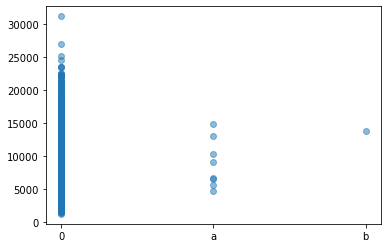

In [21]:
plt.scatter(x = data_1["StateHoliday"], y = data_1["Sales"],alpha = 0.5)

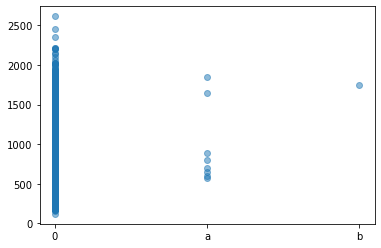

In [22]:
plt.scatter(x = data_1["StateHoliday"], y = data_1["Customers"],alpha = 0.5)

**So I think that there is no meaningful information**

In [23]:
data_1.drop(["StateHoliday"],axis = 1, inplace = True)

### School Holiday

In [24]:
data_1["SchoolHoliday"].value_counts()

0    12088
1     2907
Name: SchoolHoliday, dtype: int64

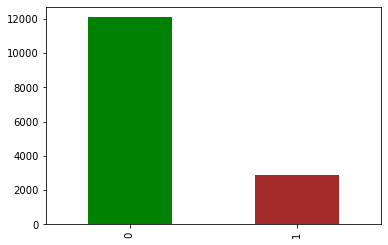

In [25]:
data_1["SchoolHoliday"].value_counts().sort_values(ascending = False).plot(kind = 'bar', color = ["g",'brown'])

Text(0, 0.5, 'Sales')

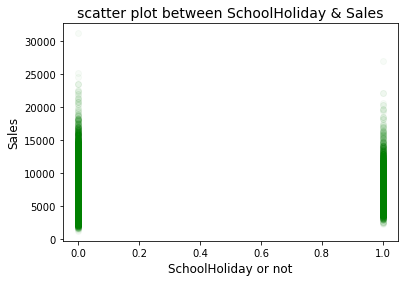

In [26]:
plt.scatter(x = data_1["SchoolHoliday"], y = data_1["Sales"], alpha = 0.03, color = 'g')
plt.title("scatter plot between SchoolHoliday & Sales", fontsize = 14)
plt.xlabel("SchoolHoliday or not", fontsize = 12)
plt.ylabel("Sales", fontsize = 12)

Text(0, 0.5, 'Customers')

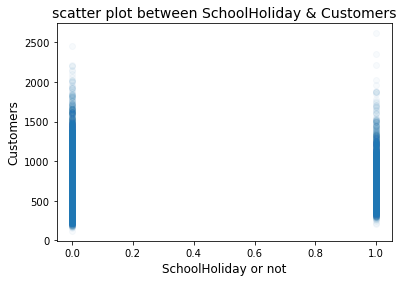

In [27]:
plt.scatter(x = data_1["SchoolHoliday"], y = data_1["Customers"], alpha = 0.03)
plt.title("scatter plot between SchoolHoliday & Customers", fontsize = 14)
plt.xlabel("SchoolHoliday or not", fontsize = 12)
plt.ylabel("Customers", fontsize = 12)

In [28]:
i= data_1[data_1["SchoolHoliday"] ==0]['Sales'].mean()
j =data_1[data_1["SchoolHoliday"] ==1]['Sales'].mean()
print("No SchoolHoliday : ",i)
print("Yes SchoolHoliday : ",j)
print("Diff : ",j-i)
print("percent: ",(j-i)/i, "%")

No SchoolHoliday :  7334.562210456651
Yes SchoolHoliday :  7623.383900928792
Diff :  288.8216904721412
percent:  0.03937817720877428 %


In [29]:
i= data_1[data_1["SchoolHoliday"] ==0]['Customers'].mean()
j =data_1[data_1["SchoolHoliday"] ==1]['Customers'].mean()
print("No SchoolHoliday : ",i)
print("Yes SchoolHoliday : ",j)
print("Diff : ",j-i)
print("percent: ",(j-i)/i, "%")

No SchoolHoliday :  695.2025976174718
Yes SchoolHoliday :  719.9439284485724
Diff :  24.741330831100527
percent:  0.03558866280979317 %


**i'm not sure that whether Promo relate with Sales.**
 일단 keep

### StoreType

In [30]:
data_1["StoreType"].value_counts()

a    8464
d    4435
c    1923
b     173
Name: StoreType, dtype: int64

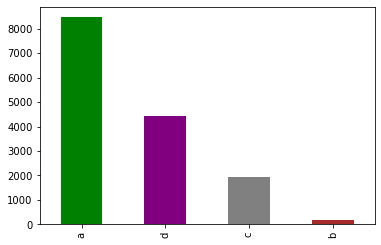

In [31]:
data_1["StoreType"].value_counts().sort_values(ascending = False).plot(kind = 'bar',color = ["g",'purple','gray','brown'])

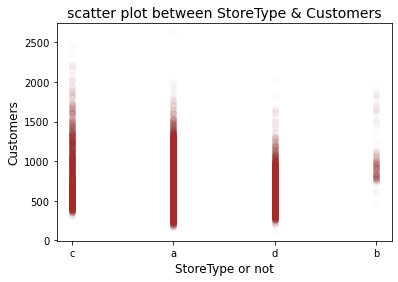

In [32]:
plt.scatter(x = data_1["StoreType"], y = data_1["Customers"], alpha = 0.02, color = 'brown')
plt.title("scatter plot between StoreType & Customers", fontsize = 14)
plt.xlabel("StoreType or not", fontsize = 12)
plt.ylabel("Customers", fontsize = 12)
plt.show()

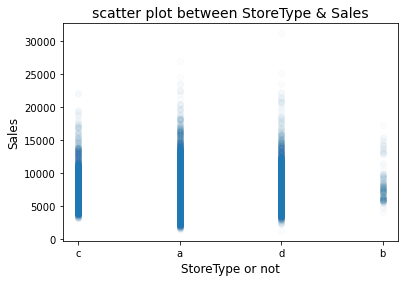

In [33]:
plt.scatter(x = data_1["StoreType"], y = data_1["Sales"], alpha = 0.02)
plt.title("scatter plot between StoreType & Sales", fontsize = 14)
plt.xlabel("StoreType or not", fontsize = 12)
plt.ylabel("Sales", fontsize = 12)
plt.show()

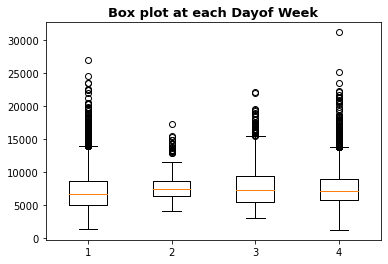

In [34]:
A = []
for i in ['a','b','c','d']:
    A.append(data_1[data_1["StoreType"] ==i]['Sales'])
plt.boxplot(A)
plt.title("Box plot at each Dayof Week",  fontsize = 13, fontweight='bold')
plt.show()

In [35]:
i= data_1[data_1["StoreType"] =='a']['Sales'].mean()
j =data_1[data_1["StoreType"] =='b']['Sales'].mean()
k= data_1[data_1["StoreType"] =='c']['Sales'].mean()
l =data_1[data_1["StoreType"] =='d']['Sales'].mean()
print("a Storetype : ",i)
print("b Storetype : ",j)
print("c Storetype : ",k)
print("d Storetype : ",l)
print("Diff : ",j-i)
print("percent: ",(j-i)/i, "%")

a Storetype :  7128.719754253309
b Storetype :  8109.676300578035
c Storetype :  7849.834633385335
d Storetype :  7663.060879368659
Diff :  980.9565463247263
percent:  0.13760627155239824 %


In [36]:
i= data_1[data_1["StoreType"] =='a']['Customers'].mean()
j =data_1[data_1["StoreType"] =='b']['Customers'].mean()
k= data_1[data_1["StoreType"] =='c']['Customers'].mean()
l =data_1[data_1["StoreType"] =='d']['Customers'].mean()
print("a Storetype : ",i)
print("b Storetype : ",j)
print("c Storetype : ",k)
print("d Storetype : ",l)
print("Diff : ",j-i)
print("percent: ",(j-i)/i, "%")

a Storetype :  709.7761105860113
b Storetype :  993.8439306358382
c Storetype :  817.9370774830993
d Storetype :  618.7402480270575
Diff :  284.0678200498269
percent:  0.4002217259965152 %


### 각 스토어마다의 편차가 보인다. 중요해 보인다.

In [37]:
data_1["Assortment"].value_counts()

a    8061
c    6934
Name: Assortment, dtype: int64

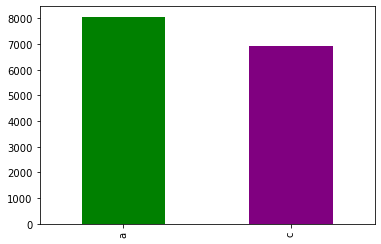

In [38]:
data_1["Assortment"].value_counts().sort_values(ascending = False).plot(kind = 'bar',color = ["g",'purple','gray','brown'])

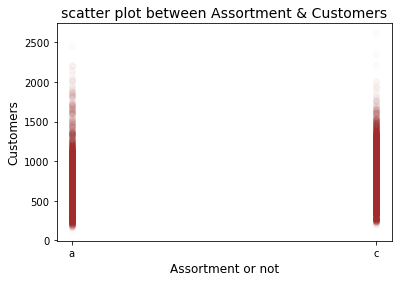

In [39]:
plt.scatter(x = data_1["Assortment"], y = data_1["Customers"], alpha = 0.02, color = 'brown')
plt.title("scatter plot between Assortment & Customers", fontsize = 14)
plt.xlabel("Assortment or not", fontsize = 12)
plt.ylabel("Customers", fontsize = 12)
plt.show()

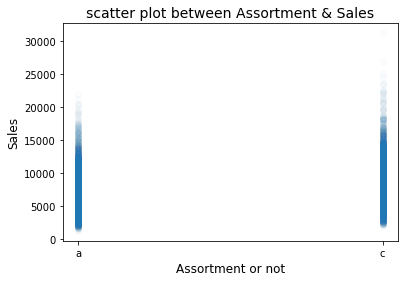

In [40]:
plt.scatter(x = data_1["Assortment"], y = data_1["Sales"], alpha = 0.02)
plt.title("scatter plot between Assortment & Sales", fontsize = 14)
plt.xlabel("Assortment or not", fontsize = 12)
plt.ylabel("Sales", fontsize = 12)
plt.show()

In [41]:
i= data_1[data_1["Assortment"] =='a']['Sales'].mean()
j =data_1[data_1["Assortment"] =='c']['Sales'].mean()
print("a Assortment : ",i)
print("c Assortment : ",j)
print("Diff : ",j-i)
print("percent: ",(j-i)/i, "%")

a Assortment :  6707.508125542737
c Assortment :  8184.618113642919
Diff :  1477.109988100182
percent:  0.22021739824290737 %


In [42]:
i= data_1[data_1["Assortment"] =='a']['Customers'].mean()
j =data_1[data_1["Assortment"] =='c']['Customers'].mean()
print("a Assortment : ",i)
print("c Assortment : ",j)
print("Diff : ",j-i)
print("percent: ",(j-i)/i, "%")

a Assortment :  660.2963652152339
c Assortment :  746.1547447360831
Diff :  85.85837952084921
percent:  0.13003006535233969 %


**실제론 데이터가 'a' and 'c'만 존재한다.**
- basic vs extended
- 일단은 keep
- 꽤나 차이난다

### CompetitionDistance

In [43]:
unique_store = list(data_1["CompetitionDistance"].unique())

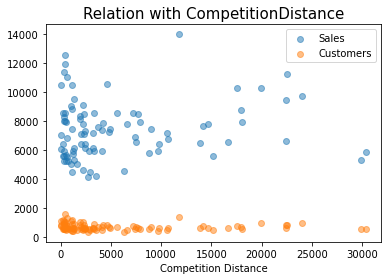

In [44]:
# competition Distance와 Sales
# competitiion Distance와 customer 와의 관계
customers = []
Sales = []
for i in unique_store:
    j = data_1[data_1["CompetitionDistance"] ==i]
    customers.append(j["Sales"].mean())
    Sales.append(j["Customers"].mean())
    
plt.scatter(unique_store,customers,alpha = 0.5)
plt.scatter(unique_store,Sales, alpha = 0.5)
plt.title("Relation with CompetitionDistance", fontsize = 15)
plt.xlabel("Competition Distance")

plt.legend(["Sales","Customers"])
plt.show()

In [45]:
#check if there is another distance on test sample
for i in set(data_t["CompetitionDistance"]):
    if i not in set(data_1["CompetitionDistance"]):
        print(i)

**즉, 새로운 competition distance가 없다는 것은, distance 가 같은 것을 같은 'Store'로 판단하여, 
각 store별로의 sales의 변화를 볼 수 있다는 말이다.**

#### 방법 3가지
- distance가 같은 것을 하나의 스토어로 정의 내려서, store 별로 나눈다.
- 나눌때, 92개의 store 를 각각 한다. (curse of dimension 발생)
- 구간별로 나눠서 그룹화한다.

- distance를 min-max 떄린다.

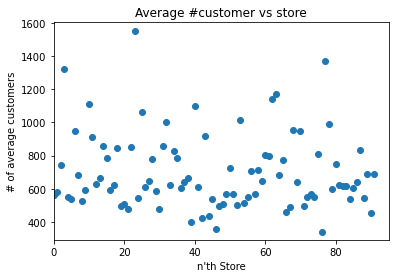

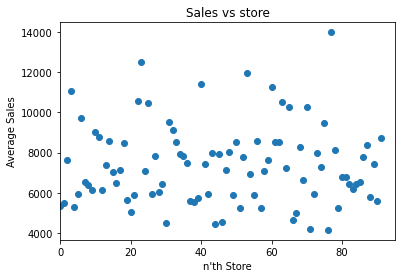

In [46]:
store = list(range(len(unique_store)))
store_sales = []
store_customers= []
for i in unique_store:
    store_sales.append(data_1[data_1["CompetitionDistance"] == i]["Sales"].mean())
    store_customers.append(data_1[data_1["CompetitionDistance"] == i]["Customers"].mean())



plt.scatter(x=store, y = store_customers)
plt.title("Average #customer vs store")
plt.axis([0,95,min(store_customers)-50,max(store_customers)+50])
plt.xlabel("n'th Store")
plt.ylabel("# of average customers")
plt.show()
# Charmander
plt.scatter(x=store, y = store_sales)
plt.title("Sales vs store")
plt.axis([0,95,min(store_sales)-500,max(store_sales)+500])
plt.xlabel("n'th Store")
plt.ylabel("Average Sales")
plt.show()

In [47]:
data_1["Competition_distance**2"]= 1/ (data_1["CompetitionDistance"]**2)

**당연하겠지만, 각 마켓별로 customer 수와 sales의 값은 비슷한 지표를 보인다**

### Promo & Promo2

In [48]:
data_1["Promo"].value_counts()

0    8285
1    6710
Name: Promo, dtype: int64

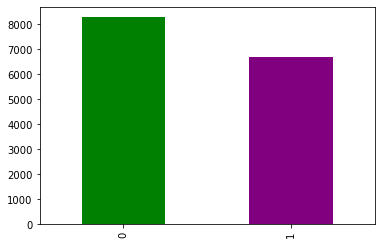

In [49]:
data_1["Promo"].value_counts().sort_values(ascending = False).plot(kind = 'bar',color = ["g",'purple','gray','brown'])

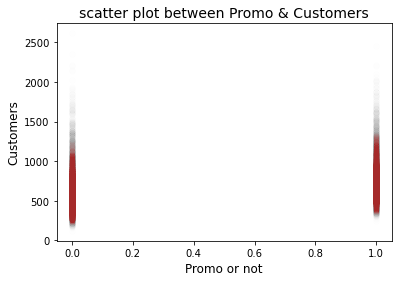

In [50]:
plt.scatter(x = data_1["Promo"], y = data_1["Customers"], alpha = 0.003, color = 'brown')
plt.title("scatter plot between Promo & Customers", fontsize = 14)
plt.xlabel("Promo or not", fontsize = 12)
plt.ylabel("Customers", fontsize = 12)
plt.show()

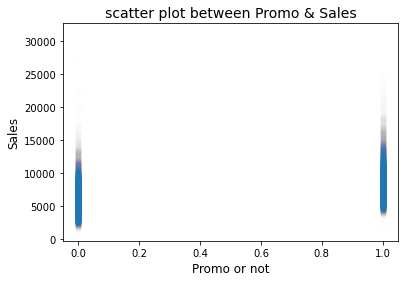

In [51]:
plt.scatter(x = data_1["Promo"], y = data_1["Sales"], alpha = 0.003)
plt.title("scatter plot between Promo & Sales", fontsize = 14)
plt.xlabel("Promo or not", fontsize = 12)
plt.ylabel("Sales", fontsize = 12)
plt.show()

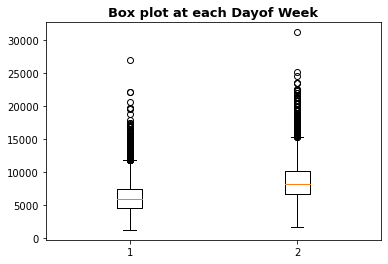

In [52]:
A = []
for i in [0,1]:
    A.append(data_1[data_1["Promo"] ==i]['Sales'])
plt.boxplot(A)
plt.title("Box plot at each Dayof Week",  fontsize = 13, fontweight='bold')
plt.show()

In [53]:
i= data_1[data_1["Promo"] ==0]['Sales'].mean()
j =data_1[data_1["Promo"] ==1]['Sales'].mean()
print("No Promo : ",i)
print("Yes Promo : ",j)
print("Diff : ",j-i)
print("percent: ",(j-i)/i, "%")

No Promo :  6279.5340977670485
Yes Promo :  8762.358420268256
Diff :  2482.8243225012075
percent:  0.3953835242942752 %


**차이가 보인다.**

In [54]:
data_1["Promo2"].value_counts()

1    7911
0    7084
Name: Promo2, dtype: int64

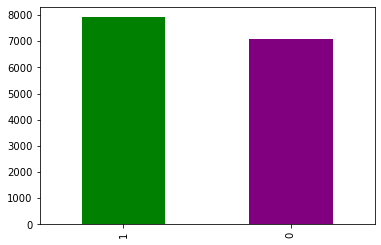

In [55]:
data_1["Promo2"].value_counts().sort_values(ascending = False).plot(kind = 'bar',color = ["g",'purple','gray','brown'])

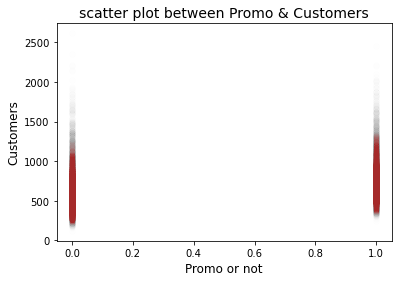

In [56]:
plt.scatter(x = data_1["Promo"], y = data_1["Customers"], alpha = 0.003, color = 'brown')
plt.title("scatter plot between Promo & Customers", fontsize = 14)
plt.xlabel("Promo or not", fontsize = 12)
plt.ylabel("Customers", fontsize = 12)
plt.show()

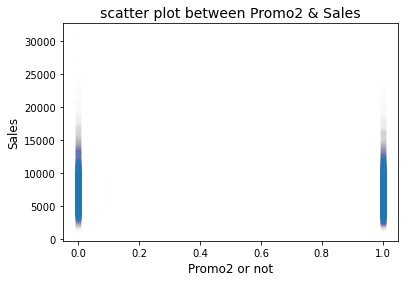

In [57]:
plt.scatter(x = data_1["Promo2"], y = data_1["Sales"], alpha = 0.003)
plt.title("scatter plot between Promo2 & Sales", fontsize = 14)
plt.xlabel("Promo2 or not", fontsize = 12)
plt.ylabel("Sales", fontsize = 12)
plt.show()

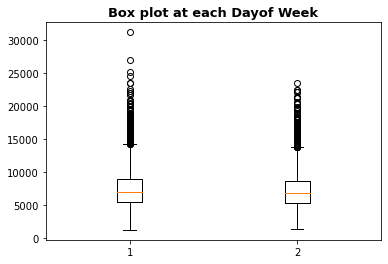

In [58]:
A = []
for i in [0,1]:
    A.append(data_1[data_1["Promo2"] ==i]['Sales'])
plt.boxplot(A)
plt.title("Box plot at each Dayof Week",  fontsize = 13, fontweight='bold')
plt.show()

In [59]:
i= data_1[data_1["Promo2"] ==0]['Sales'].mean()
j =data_1[data_1["Promo2"] ==1]['Sales'].mean()
print("No Promo2 : ",i)
print("Yes Promo2 : ",j)
print("Diff : ",i-j)
print("percent: ",(i-j)/i, "%")

No Promo2 :  7526.999435347261
Yes Promo2 :  7268.373277714574
Diff :  258.62615763268695
percent:  0.034359795009172224 %


**Promo2 의 차이는 잘 모르겠다(판단필요)**

### month & Year

In [60]:
data_1["month"].value_counts(ascending = True)

11     885
12     903
8      937
10     937
9      980
5     1407
2     1420
4     1423
6     1464
1     1528
7     1535
3     1576
Name: month, dtype: int64

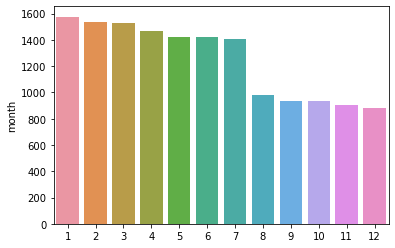

In [61]:
sns.barplot([1,2,3,4,5,6,7,8,9,10,11,12],data_1["month"].value_counts())

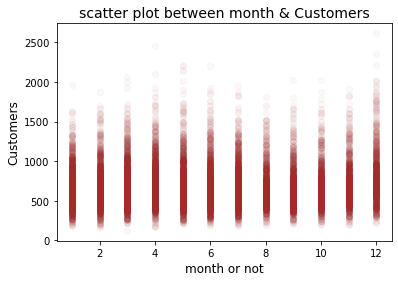

In [62]:
plt.scatter(x = data_1["month"], y = data_1["Customers"], alpha = 0.03, color = 'brown')
plt.title("scatter plot between month & Customers", fontsize = 14)
plt.xlabel("month or not", fontsize = 12)
plt.ylabel("Customers", fontsize = 12)
plt.show()

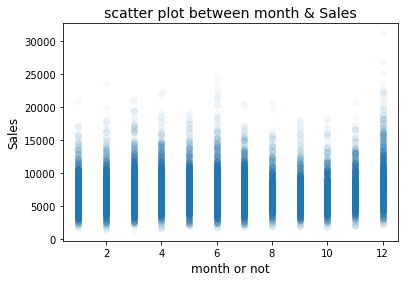

In [63]:
plt.scatter(x = data_1["month"], y = data_1["Sales"], alpha = 0.03)
plt.title("scatter plot between month & Sales", fontsize = 14)
plt.xlabel("month or not", fontsize = 12)
plt.ylabel("Sales", fontsize = 12)
plt.show()

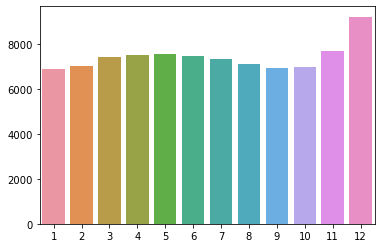

In [64]:
A = []
for i in range(1,13):
    A.append(data_1[data_1["month"]==i]["Sales"].mean())
sns.barplot([1,2,3,4,5,6,7,8,9,10,11,12],A)

In [65]:
for i in range(1,13):
    print("{}th month".format(i), A[i-1])
    
print("Max diff", max(A)-min(A))
print()
print("ratio ", (max(A)-min(A))/min(A))

1th month 6867.7048429319375
2th month 7042.501408450704
3th month 7410.203045685279
4th month 7512.511595221364
5th month 7559.152096659559
6th month 7476.36543715847
7th month 7328.649511400651
8th month 7127.324439701174
9th month 6922.866326530612
10th month 6997.659551760939
11th month 7668.081355932203
12th month 9215.949058693244
Max diff 2348.244215761307

ratio  0.34192561699532825


#### 12월의 평균 sales 값 차이가 크다.

In [66]:
data_1["year"].value_counts(ascending = True)

15    3491
14    5449
13    6055
Name: year, dtype: int64

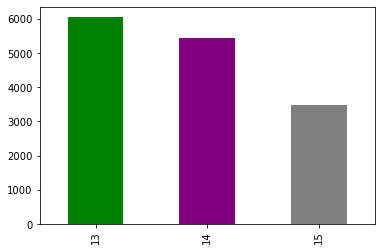

In [67]:
data_1["year"].value_counts().sort_values(ascending = False).plot(kind = 'bar',color = ["g",'purple','gray'])

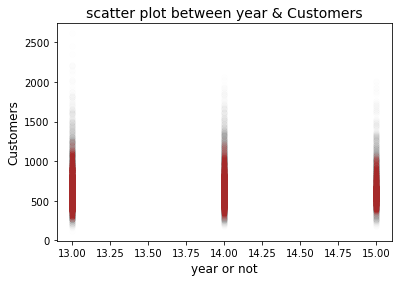

In [68]:
plt.scatter(x = data_1["year"], y = data_1["Customers"], alpha = 0.003, color = 'brown')
plt.title("scatter plot between year & Customers", fontsize = 14)
plt.xlabel("year or not", fontsize = 12)
plt.ylabel("Customers", fontsize = 12)
plt.show()

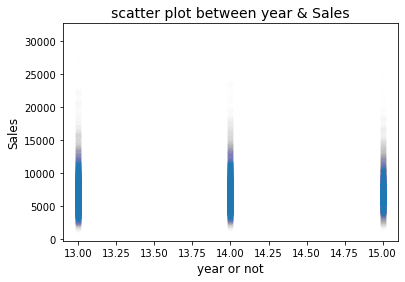

In [69]:
plt.scatter(x = data_1["year"], y = data_1["Sales"], alpha = 0.003)
plt.title("scatter plot between year & Sales", fontsize = 14)
plt.xlabel("year or not", fontsize = 12)
plt.ylabel("Sales", fontsize = 12)
plt.show()

In [70]:
i= data_1[data_1["year"] ==13]['Sales'].mean()
j =data_1[data_1["year"] ==14]['Sales'].mean()
k =data_1[data_1["year"] ==15]['Sales'].mean()
print("2013 : ",i)
print("2014 : ",j)
print("2015 : ",k)
print("max Diff : ",k-i)
print("percent: ",(k-i)/i, "%")

2013 :  7216.644921552436
2014 :  7493.539181501193
2015 :  7531.448009166428
max Diff :  314.8030876139919
percent:  0.04362180639840485 %


 **not that much differnence**

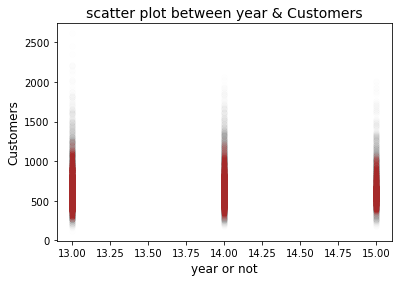

In [71]:
plt.scatter(x = data_1["year"], y = data_1["Customers"], alpha = 0.003, color = 'brown')
plt.title("scatter plot between year & Customers", fontsize = 14)
plt.xlabel("year or not", fontsize = 12)
plt.ylabel("Customers", fontsize = 12)
plt.show()

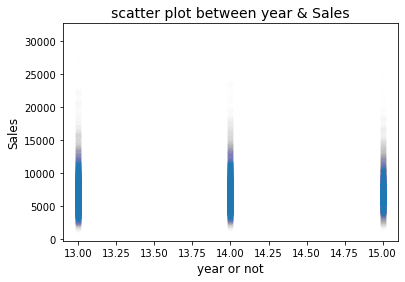

In [72]:
plt.scatter(x = data_1["year"], y = data_1["Sales"], alpha = 0.003)
plt.title("scatter plot between year & Sales", fontsize = 14)
plt.xlabel("year or not", fontsize = 12)
plt.ylabel("Sales", fontsize = 12)
plt.show()

In [73]:
i= data_1[data_1["year"] ==13]['Sales'].mean()
j =data_1[data_1["year"] ==14]['Sales'].mean()
k =data_1[data_1["year"] ==15]['Sales'].mean()
print("2013 : ",i)
print("2014 : ",j)
print("2015 : ",k)
print("max Diff : ",k-i)
print("percent: ",(k-i)/i, "%")

2013 :  7216.644921552436
2014 :  7493.539181501193
2015 :  7531.448009166428
max Diff :  314.8030876139919
percent:  0.04362180639840485 %


Text(0, 0.5, 'Average Sales')

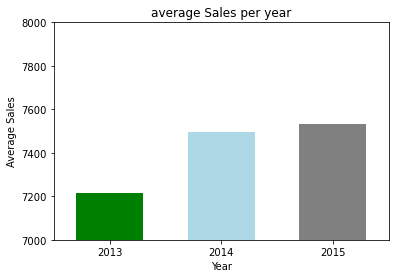

In [74]:
plt.bar(['2013','2014','2015'],[i,j,k], width = 0.6,color = ['green','lightblue','gray'])
plt.axis([-0.5,2.5,7000,8000])
plt.title("average Sales per year")
plt.xlabel("Year")
plt.ylabel("Average Sales")

Text(0.5, 1.0, '2015')

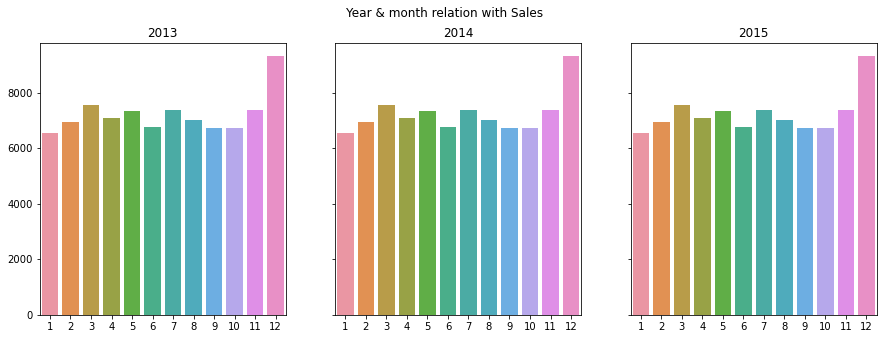

In [75]:
da_13 = data_1[data_1["year"] ==13]
da_14 = data_1[data_1["year"] ==13]
da_15 = data_1[data_1["year"] ==13]
x_label = [1,2,3,4,5,6,7,8,9,10,11,12]
A = []
B = []
C = []

for i in range(1,13):
    A.append(da_13[da_13["month"]==i]["Sales"].mean())
    B.append(da_14[da_14["month"]==i]["Sales"].mean())
    C.append(da_14[da_15["month"]==i]["Sales"].mean())

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Year & month relation with Sales')

# Bulbasaur
sns.barplot(ax=axes[0], x=x_label, y = A)
axes[0].set_title(2013)

# Charmander
sns.barplot(ax=axes[1], x=x_label, y=B)
axes[1].set_title(2014)

# Squirtle
sns.barplot(ax=axes[2], x=x_label, y=C)
axes[2].set_title(2015)


- 연간 소득 차이는없다.
- month 간 소득 flow 는 그대로 보존된다.
- year 는 drop

In [76]:
data_1.drop(["year"], axis = 1, inplace = True)

### Sales & Customers (of course good)

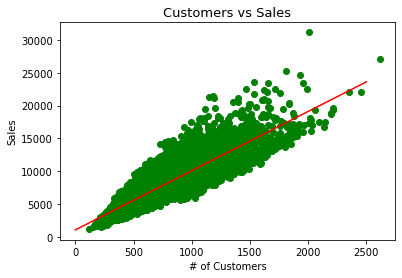

MAE: 1089.383942077887
MSE: 2060814.194655156
RMSE: 1435.5536195681289
MAPE: 15.359126303488704
MAE: -3.7973407684185454
R-Squared: 0.7452920485488953


In [77]:
### Sales & Customers (of course good)

X = data_1["Customers"].values.reshape(-1,1)
y = data_1["Sales"].values.reshape(-1,1)
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
model = linear_model.LinearRegression()
model.fit(X,y)
x = np.arange(0,3000, 500)
y = float(model.intercept_) + x*float(model.coef_)
plt.plot(x,y, 'r')
plt.scatter( x = data_1["Customers"], y = data_1["Sales"], color= 'green')
plt.xlabel("# of Customers")
plt.ylabel("Sales")
plt.title("Customers vs Sales", fontsize = 13 )
plt.show()

X = data_1["Customers"].values.reshape(-1,1)
y = data_1["Sales"].values.reshape(-1,1)
y_pred = model.predict(X)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

print("MAE:", mean_absolute_error(y, y_pred))
print("MSE:",mean_squared_error(y, y_pred))
print("RMSE:",mean_squared_error(y, y_pred)**0.5)
def MAPE(y_test, y_pred):
    return(np.mean(np.abs((y - y_pred) / y)) * 100)

print("MAPE:", MAPE(y, y_pred))
     
def MAE(y_test, y_pred): 
    return np.mean((y_test - y_pred) / y_test) * 100

print("MAE:", MAE(y, y_pred))

from sklearn.metrics import r2_score

print('R-Squared:', r2_score(y,y_pred))

### data_transformation

In [78]:
data_1.corr()

,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2,month,Sales,Competition_distance**2
Customers,1.000000,0.277860,0.035885,-0.077708,-0.078790,0.072839,0.863303,0.097993
Promo,0.277860,1.000000,0.032627,-0.001733,-0.006457,-0.007608,0.434019,-0.002265
SchoolHoliday,0.035885,0.032627,1.000000,-0.009828,0.010251,0.122491,0.040141,0.022294
CompetitionDistance,-0.077708,-0.001733,-0.009828,1.000000,-0.120229,0.013173,0.076369,-0.154022
Promo2,-0.078790,-0.006457,0.010251,-0.120229,1.000000,-0.027996,-0.045392,0.170350
month,0.072839,-0.007608,0.122491,0.013173,-0.027996,1.000000,0.091560,0.001662
Sales,0.863303,0.434019,0.040141,0.076369,-0.045392,0.091560,1.000000,-0.005016
Competition_distance**2,0.097993,-0.002265,0.022294,-0.154022,0.170350,0.001662,-0.005016,1.000000


In [79]:
data_1.corr()['Sales'].sort_values(ascending=False)

Sales                      1.000000
Customers                  0.863303
Promo                      0.434019
month                      0.091560
CompetitionDistance        0.076369
SchoolHoliday              0.040141
Competition_distance**2   -0.005016
Promo2                    -0.045392
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Correlation')

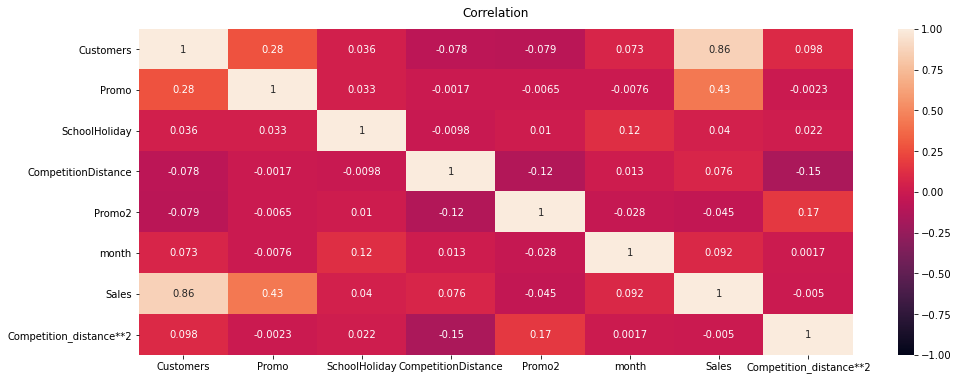

In [80]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data_1.corr(), vmin=-1, vmax=1, annot=True)  
heatmap.set_title('Correlation',  pad=12)

**before handling Categorical / nominal data**
- Categorical => One-hot Encoding
- Nominal data => numeric value



**CompetitionDistance** 를 크게 3가지

    1) 각 값을 그냥 min max 때린다. (dimension은 그대로)
    
    2) 92개의 distance로 나눔 (총 92개의 store)
    
    3) group 별로 나눠줌 (n개)
    
    
**month**

    1) 각 12개월을 개별로 나눌지
    
    2) 비슷한 느낌을 group화 할지 
    
    
    
**Assortment**
    
    1) a & c 만 존재 (basic, extended)
    
    
**StoreType**

    1) a,b,c,d 가 존재

In [81]:
## Basic step1) just drop all of the null data.
data_1st = data_1.dropna()

In [82]:
data_1.duplicated().value_counts()
# No duplicated. All data are not same

False    14995
dtype: int64

In [83]:
# Assortment handling
data_1["Assortment"] = data_1["Assortment"].map({'a':0, 'c':1})
data_1["Assortment"].value_counts()

0    8061
1    6934
Name: Assortment, dtype: int64

**Using One-hot encoding** (only Cat-feat) 

- **After do the data processing, I will divide the Test and Train again**

##### Scale numerical features
- Scale numerical features to have mean 0 and standard deviation 1
- Use `StandardScaler` provided by Scikit-Learn package
- Select numerical feature columns and call `fit_trnasform()` method
- This is why, we have to reduce the skewed size issue.
- we will use the **sklearn.preprocessing , StandardScaler**

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [85]:
def data_transformation(data_1, cat_feat, cat_already_feat, num_feat):
    encoder = OneHotEncoder(sparse=False)

    ## categorical value, One-hot encoding and concatenate
    num = len(cat_feat)
    A = []
    for i in range(num):
        index = cat_feat[i]
        encoder.fit(data_1[index].values.reshape(-1, 1))
        A.append(encoder.transform(data_1[index].values.reshape(-1, 1)))
    X1_cat = np.concatenate(A[:], axis=1)

    # make matrix (already categorized variables)
    X1_cat_already_feat = data_1[cat_already_feat]
    
    #one-hot encoding to num_feat
    scalar1 = StandardScaler()
    scalar1.fit(data_1[num_feat].values)
    X1_num = scalar1.transform(data_1[num_feat].values)
    X11 = np.concatenate([X1_num, X1_cat, X1_cat_already_feat], axis=1)
    
    return X11

### i) Just one hot encoding all of them

In [86]:
# let us first separate numerical and categorical columns
cat_feat_1 = ["StoreType", "month"]
cat_already_feat_1 = ['Promo',"SchoolHoliday","Assortment", "Promo2"]
num_feat_1 = ['Customers','CompetitionDistance']

# divide into dependent variable and independent variables
X, y = data_1.iloc[:,:-1], data_1.iloc[:,-1]

## making data_transformation
data_full1 = data_transformation(data_1, cat_feat_1, cat_already_feat_1, num_feat_1)
data_full1.shape

(14995, 22)

### ii) Competition Distance -> store (one hot encoding into 92)

In [87]:
# let us first separate numerical and categorical columns
cat_feat_2 = ["StoreType", "month",'CompetitionDistance']
cat_already_feat_2 = ['Promo',"SchoolHoliday","Assortment", "Promo2"]
num_feat_2 = ['Customers']

# divide into dependent variable and independent variables
X, y = data_1.iloc[:,:-1], data_1.iloc[:,-1]

## making data_transformation
data_full2 = data_transformation(data_1, cat_feat_2, cat_already_feat_2, num_feat_2)
data_full2.shape

(14995, 113)

### iii) Competition Distance -> store (grouping into similiar sales)

In [88]:
### Competition Distance -> store (one hot encoding into 92)

In [89]:
import statistics as st
print(st.stdev(store_sales))
print(st.mean(store_sales))
print(min(store_sales))
print(max(store_sales))

1980.8837419725533
7387.156652245541
4154.308641975309
13985.658385093167


In [90]:
# i+1 개로 grouping

def filtering(store_sales, i):
    dictionary = {}
    
    max_val = max(store_sales)
    min_val = min(store_sales)
    step = (max_val-min_val)/i
    
    for j in range(0,i+1):
        left = min_val + j*step
        right = min_val + (j+1)*step
        for k in range(len(store_sales)):
            if (store_sales[k]>=left) & (store_sales[k]<right):
                dictionary[store_sales[k]] = j
    return dictionary
    

In [91]:
# making dictionary_style
dictionary = {}
for i in store:
    dictionary[unique_store[i]] = store_sales[i]

dictionary_2 = filtering(store_sales, 10)

dictionary_3 = {}
for i in range(len(dictionary)):
    a = unique_store[i]
    b =dictionary[a]
    c =dictionary_2[b]
    dictionary_3[a] = c
 


In [92]:
dat_imm =data_1.copy()
dat_imm["CompetitionDistance"] = dat_imm["CompetitionDistance"].map(dictionary_3)


In [93]:
dat_imm

,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,month,Sales,Competition_distance**2
0,560,1,1,c,0,1,0,7,5571,6.200012e-07
1,612,1,1,c,0,1,0,7,6714,6.200012e-07
2,519,1,0,c,0,1,0,7,5371,6.200012e-07
3,449,0,0,c,0,1,0,7,4257,6.200012e-07
4,447,0,0,c,0,1,0,6,4209,6.200012e-07
...,...,...,...,...,...,...,...,...,...,...
14990,694,0,0,d,0,4,0,1,7730,3.110566e-09
14991,743,0,0,d,0,4,0,1,9224,3.110566e-09
14992,389,0,0,d,0,4,0,1,4559,3.110566e-09
14993,453,0,0,d,0,4,0,1,5702,3.110566e-09


In [94]:
cat_feat_3 = ["StoreType", "month",'CompetitionDistance']
cat_already_feat_3 = ['Promo',"SchoolHoliday","Assortment", "Promo2"]
num_feat_3 = ['Customers']

data_full3 = data_transformation(dat_imm, cat_feat_2, cat_already_feat_2, num_feat_2)
data_full3.shape

(14995, 31)

### Distance -> store 로보는 것에 대한 정당화

- 기존 distance vs sales 는 관련이 없다.
- 따라서, continous variable인 distance의 수치가 커짐에 따라 (혹은 작아짐에 따라) sales에 영향을 미치지 않기 때문에
    - 각 distance를 one-hot encoding을 통해, 각 store로 나눔
    
이때, 가령 distance가 1000인 store의 매출액의 차이가 크게 안나는지를 확인.
(즉, distance =1000 => 13th store로 바꿧을 경우, 13번째 스토어만 갖고 있는 전체 데이터의 편차가 크지 않는 것을 봐야한다.)

####  여기부터는 각 distance를 store로 환산하였을 경우의 예시 4가지

In [95]:
# distance 의 종류
data_1["CompetitionDistance"].unique()

array([ 1270,   570, 14130,   620, 29910,   310, 24000,  7520,  2030,
        3160,   960,  1070,  1300,  4110,  3270,    50, 13840,  3240,
        2340,   550,  1040,  4060,  4590,   430,  2300,    60,  1200,
        2170,    40,  9800,  2910,  1320,  2240,  7660,   540,  4230,
        1090,   260,   180,  1180,   290,  4880,  9710,   270,  1060,
       18010,  6260, 10570,   450, 30360,  7170,   720,  6620,   420,
        7340,  2840,  5540,   350,  2050,  3700, 22560,   410,   250,
        1130,  4840, 17500,  2200,  1650,   330, 22440, 19960,  3510,
        3320,  7910,  2370, 22390,  2710, 11810,  1870,   480,   560,
       10690,  2380,  2410,   240, 16690, 14620,  1890,  8780,  8980,
       15140, 17930], dtype=int64)

In [96]:
# 각 distance 별, transcation 수
data_1["CompetitionDistance"].value_counts()

1090     335
13840    307
330      303
7660     300
310      291
        ... 
17930    116
1040     113
2200     113
1180     110
2370     110
Name: CompetitionDistance, Length: 92, dtype: int64

In [97]:
#1090 distance 를 가지고 비교
data_1090 = data_1[data_1["CompetitionDistance"] ==1090]
data_1090

,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,month,Sales,Competition_distance**2
5578,499,1,1,d,0,1090,0,7,7090,8.416800e-07
5579,388,0,1,d,0,1090,0,7,4620,8.416800e-07
5580,411,0,1,d,0,1090,0,7,4609,8.416800e-07
5581,497,0,1,d,0,1090,0,7,5718,8.416800e-07
5582,458,0,1,d,0,1090,0,7,5165,8.416800e-07
...,...,...,...,...,...,...,...,...,...,...
11550,526,0,0,d,1,1090,1,1,5808,8.416800e-07
11551,582,0,0,d,1,1090,1,1,5818,8.416800e-07
11552,657,1,1,d,1,1090,1,1,7538,8.416800e-07
11553,683,1,1,d,1,1090,1,1,8218,8.416800e-07


In [98]:
data_1090["StoreType"].value_counts()

d    335
Name: StoreType, dtype: int64

In [99]:
data_1090["Assortment"].value_counts()


# distance 가 동일하게 1090 이라고 할지라도, Assortment가 다르다. 즉, 다른 스토어이다!

1    181
0    154
Name: Assortment, dtype: int64

In [100]:
data_1090["Promo2"].value_counts()

1    181
0    154
Name: Promo2, dtype: int64

In [101]:
# promo2 와 assorment는 동일하게 따라간다.
data_1090[data_1090["Assortment"] ==1]["Promo2"].value_counts()

1    181
Name: Promo2, dtype: int64

8302.674033149171


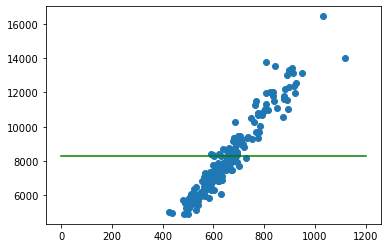

In [102]:
ime = data[data["CompetitionDistance"] ==1090]
ime_1 = ime[ime["Assortment"]=='a']
ime_0 = ime[ime["Assortment"] =='c']


print(ime_0["Sales"].mean())
X_range = [0,1200]
y_range = [ime_0["Sales"].mean(),ime_0["Sales"].mean()]

plt.scatter(ime_0["Customers"], ime_0["Sales"])
plt.plot(X_range,y_range, 'g')





# distance가 1090이고, Assortment가 'c' 인 매장의 customer vs sales 의 scatterplot/ 평균

6476.058441558442



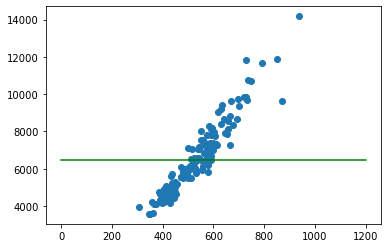

In [103]:
print(ime_1["Sales"].mean())
X_range = [0,1200]
y_range = [ime_1["Sales"].mean(),ime_1["Sales"].mean()]

plt.scatter(ime_1["Customers"], ime_1["Sales"])
plt.plot(X_range,y_range, 'g')

print()


# distance가 1090이고, Assortment가 'a' 인 매장의 customer vs sales 의 scatterplot/ 평균

7462.976119402985


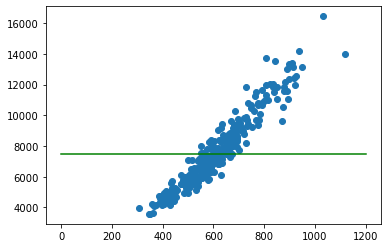

In [104]:
print(ime["Sales"].mean())
X_range = [0,1200]
y_range = [ime["Sales"].mean(),ime["Sales"].mean()]

plt.scatter(ime["Customers"], ime["Sales"])
plt.plot(X_range,y_range, 'g')



# distance가 1090인 전체 매장의 customer vs sales 의 scatterplot/ 평균

- 같은 매장이다.

In [105]:
#1090 distance 를 가지고 비교
data_13840 = data_1[data_1["CompetitionDistance"] ==13840]
data_13840[data_13840["Promo2"] ==1]
# promo2 와 assorment는 동일하게 따라간다.
# 항상 promo2를 진행한다.
data_13840["StoreType"].value_counts()

d    157
a    150
Name: StoreType, dtype: int64

In [106]:
ime[["StoreType","month","year"]].iloc[150:200,:]

,StoreType,month,year
5728,d,1,13
5729,d,1,13
5730,d,1,13
5731,d,1,13
11374,d,7,15
11375,d,7,15
11376,d,7,15
11377,d,6,15
11378,d,6,15
11379,d,6,15


In [107]:
ime = data[data["CompetitionDistance"]==13840]
ime[ime["StoreType"]=='d']["year"].value_counts()

14    66
13    58
15    33
Name: year, dtype: int64

In [108]:
ime[ime["StoreType"]=='a']["year"].value_counts()

14    64
13    52
15    34
Name: year, dtype: int64

In [109]:
ime_a = ime[ime["StoreType"] =="a"]
ime_d = ime[ime["StoreType"] =="d"]

ime_a.head(10)

,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,year,Sales
9591,511,1,1,0,1,a,c,13840,5.0,2010.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",7,15,7163
9592,463,1,0,0,0,a,c,13840,5.0,2010.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",7,15,5564
9593,416,1,0,0,0,a,c,13840,5.0,2010.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",7,15,4626
9594,295,1,0,0,0,a,c,13840,5.0,2010.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",7,15,4012
9595,516,1,1,0,0,a,c,13840,5.0,2010.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",7,15,6617
9596,373,1,0,0,0,a,c,13840,5.0,2010.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",6,15,4256
9597,546,1,1,0,0,a,c,13840,5.0,2010.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",6,15,7364
9598,365,1,0,0,0,a,c,13840,5.0,2010.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",6,15,4173
9599,531,1,1,0,0,a,c,13840,5.0,2010.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",6,15,6357
9600,601,1,1,0,0,a,c,13840,5.0,2010.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",6,15,7777


In [110]:
ime_d.head(10)

,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,year,Sales
2586,936,1,1,0,1,d,c,13840,6.0,2010.0,1,14.0,2012.0,"Jan,Apr,Jul,Oct",7,15,11007
2587,711,1,0,0,1,d,c,13840,6.0,2010.0,1,14.0,2012.0,"Jan,Apr,Jul,Oct",7,15,7047
2588,504,1,0,0,0,d,c,13840,6.0,2010.0,1,14.0,2012.0,"Jan,Apr,Jul,Oct",7,15,5181
2589,781,1,1,0,1,d,c,13840,6.0,2010.0,1,14.0,2012.0,"Jan,Apr,Jul,Oct",7,15,8714
2590,700,1,0,0,0,d,c,13840,6.0,2010.0,1,14.0,2012.0,"Jan,Apr,Jul,Oct",7,15,7082
2591,720,1,0,0,0,d,c,13840,6.0,2010.0,1,14.0,2012.0,"Jan,Apr,Jul,Oct",7,15,7396
2592,784,1,1,0,0,d,c,13840,6.0,2010.0,1,14.0,2012.0,"Jan,Apr,Jul,Oct",7,15,8594
2593,761,1,1,0,0,d,c,13840,6.0,2010.0,1,14.0,2012.0,"Jan,Apr,Jul,Oct",7,15,8732
2594,480,1,0,0,0,d,c,13840,6.0,2010.0,1,14.0,2012.0,"Jan,Apr,Jul,Oct",6,15,5151
2595,738,1,1,0,0,d,c,13840,6.0,2010.0,1,14.0,2012.0,"Jan,Apr,Jul,Oct",6,15,8556


5588.506666666667


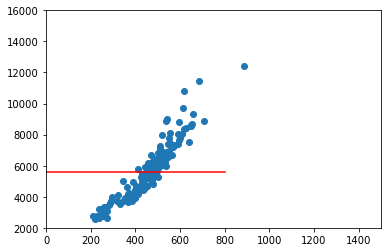

In [111]:
print(ime_a["Sales"].mean())
X_range = [0,800]
y_range = [ime_a["Sales"].mean(),ime_a["Sales"].mean()]

plt.scatter(ime_a["Customers"], ime_a["Sales"])
plt.axis([0,1500,2000,16000])
plt.plot(X_range,y_range, 'r')

7376.3057324840765


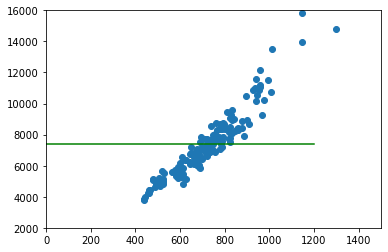

In [112]:
print(ime_d["Sales"].mean())
X_range = [0,1200]
y_range = [ime_d["Sales"].mean(),ime_d["Sales"].mean()]

plt.scatter(ime_d["Customers"], ime_d["Sales"])
plt.axis([0,1500,2000,16000])
plt.plot(X_range,y_range, 'g')

6502.788273615635


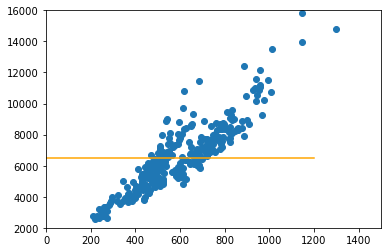

In [113]:
print(ime["Sales"].mean())
X_range = [0,1200]
y_range = [ime["Sales"].mean(),ime["Sales"].mean()]

plt.scatter(ime["Customers"], ime["Sales"])
plt.axis([0,1500,2000,16000])
plt.plot(X_range,y_range, 'orange')

In [114]:
ime_a[["Customers","Sales"]].corr()

,Customers,Sales
Customers,1.000000,0.938497
Sales,0.938497,1.000000


In [115]:
ime_d[["Customers","Sales"]].corr()

,Customers,Sales
Customers,1.000000,0.949308
Sales,0.949308,1.000000


In [116]:
ime[["Customers","Sales"]].corr()

,Customers,Sales
Customers,1.00000,0.89796
Sales,0.89796,1.00000


같은 매장이 아니다.

MOG (multiple of Gaussian 으로 볼 수 있지 않을까?)

In [117]:
data_330 = data_1[data_1["CompetitionDistance"] ==7660]
data_330["Assortment"].value_counts()

0    153
1    147
Name: Assortment, dtype: int64

In [118]:
data_330["StoreType"].value_counts()

d    300
Name: StoreType, dtype: int64

In [119]:
ime = data[data["CompetitionDistance"] ==7660]

In [120]:
ime_a = ime[ime["Assortment"] =="a"]
ime_c = ime[ime["Assortment"] =="c"]

6775.745098039216


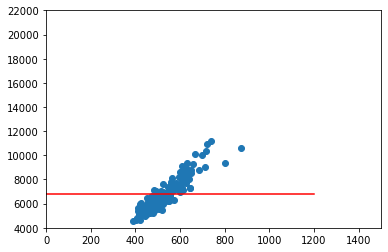

In [121]:
print(ime_a["Sales"].mean())
X_range = [0,1200]
y_range = [ime_a["Sales"].mean(),ime_a["Sales"].mean()]

plt.scatter(ime_a["Customers"], ime_a["Sales"])
plt.axis([0,1500,4000,22000])
plt.plot(X_range,y_range, 'r')

10321.319727891156


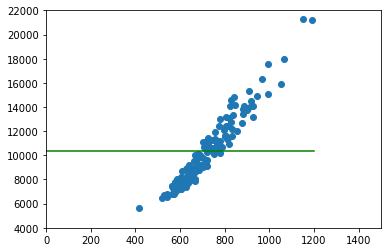

In [122]:
print(ime_c["Sales"].mean())
X_range = [0,1200]
y_range = [ime_c["Sales"].mean(),ime_c["Sales"].mean()]

plt.scatter(ime_c["Customers"], ime_c["Sales"])
plt.axis([0,1500,4000,22000])
plt.plot(X_range,y_range, 'g')

8513.076666666666


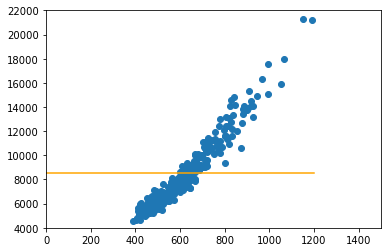

In [123]:
print(ime["Sales"].mean())
X_range = [0,1200]
y_range = [ime["Sales"].mean(),ime["Sales"].mean()]

plt.scatter(ime["Customers"], ime["Sales"])
plt.axis([0,1500,4000,22000])
plt.plot(X_range,y_range, 'orange')

In [124]:
ime_a[["Customers","Sales"]].corr()

,Customers,Sales
Customers,1.000000,0.915499
Sales,0.915499,1.000000


In [125]:
ime_d[["Customers","Sales"]].corr()

,Customers,Sales
Customers,1.000000,0.949308
Sales,0.949308,1.000000


In [126]:
ime[["Customers","Sales"]].corr()

,Customers,Sales
Customers,1.000000,0.967147
Sales,0.967147,1.000000


In [127]:
data_330 = data_1[data_1["CompetitionDistance"] ==310]
data_330["StoreType"].value_counts()

a    172
d    119
Name: StoreType, dtype: int64

In [128]:
ime = data[data["CompetitionDistance"]==310]
ime_a = ime[ime["StoreType"] =="a"]
ime_d = ime[ime["StoreType"] =="d"]

6306.895348837209


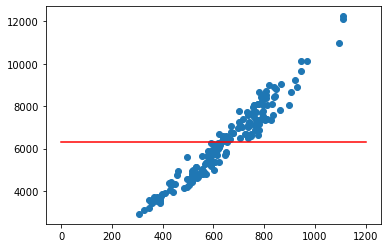

In [129]:
print(ime_a["Sales"].mean())
X_range = [0,1200]
y_range = [ime_a["Sales"].mean(),ime_a["Sales"].mean()]

plt.scatter(ime_a["Customers"], ime_a["Sales"])
plt.plot(X_range,y_range, 'r')

5376.378151260505


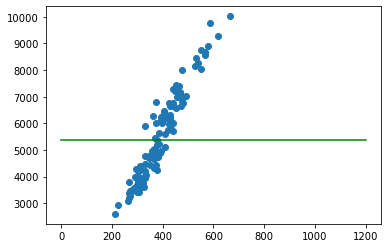

In [130]:
print(ime_d["Sales"].mean())
X_range = [0,1200]
y_range = [ime_d["Sales"].mean(),ime_d["Sales"].mean()]

plt.scatter(ime_d["Customers"], ime_d["Sales"])
#plt.axis([0,1200,1000,22000])
plt.plot(X_range,y_range, 'g')

5926.374570446736


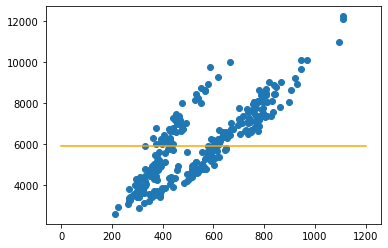

In [131]:
print(ime["Sales"].mean())
X_range = [0,1200]
y_range = [ime["Sales"].mean(),ime["Sales"].mean()]

plt.scatter(ime["Customers"], ime["Sales"])
#plt.axis([0,1500,4000,22000])
plt.plot(X_range,y_range, 'orange')

In [132]:
# 특정 a 매장
ime_a[["Customers","Sales"]].corr()

,Customers,Sales
Customers,1.00000,0.97098
Sales,0.97098,1.00000


In [133]:
# 특정 d 매장
ime_d[["Customers","Sales"]].corr()

,Customers,Sales
Customers,1.000000,0.962051
Sales,0.962051,1.000000


In [134]:
# 거리가 동일한 특정 a와 d 매장
ime[["Customers","Sales"]].corr()

,Customers,Sales
Customers,1.000000,0.832401
Sales,0.832401,1.000000


### 총 4개의 예시

### 기존의 데이터를 봤을 때
- "Assortment" 의 종류가 다양하거나
- "StoreType" 의 종류가 다양하거나 

총 두가지 였다.

그리고 아래의 식을 통해, 두 변수 모두 다변량인 경우는 찾을 수 없었다.
즉, 같은 competitionDistance 가진 경우, Assortment 혹은 Storetype 둘 중 하나로만 더 분류가 가능하다.
같은 distance를 가진 store의 종류는 maximum 2개 인 것이다.


그리고, 같은 distance 를 가진 매장을 한번 더 나눠서 총 2step 으로 분류하면 가능하다.

In [135]:
unique_distance = list(data["CompetitionDistance"].unique())

In [136]:
multi_list = []
end_list = []
for i in unique_distance:
    if len(data[data["CompetitionDistance"] ==i]["StoreType"].unique()) >1:
        multi_list.append(i)
        
for j in multi_list:
    if len(data[data["CompetitionDistance"] ==j]["Assortment"].unique()) >1:
        end_list.append(j)

In [137]:
multi_list

## 동일한 Distance 내에서, storetype이 여러개인 distance list

[310, 2030, 13840, 1200]

In [138]:
end_list

## 동일한 Distance 내에서, storetype이 여러개이면서 && Assortment 또한 여려개인 매장은 없다.

[]

In [139]:
end_list = []
for j in unique_distance:
    if len(data[data["CompetitionDistance"] ==j]["Assortment"].unique()) >1:
        end_list.append(j)

In [140]:
end_list

## 동일한 Distance 내에서, Assortment가 여러개인 distance list

[7660, 540, 1090]

In [141]:
print(data[data["CompetitionDistance"] ==310]["StoreType"].unique())
print(data[data["CompetitionDistance"] ==2030]["StoreType"].unique())
print(data[data["CompetitionDistance"] ==13840]["StoreType"].unique())
print(data[data["CompetitionDistance"] ==1200]["StoreType"].unique())


## 그때의 storetpye의 종류

['a' 'd']
['a' 'c']
['d' 'a']
['a' 'c']


In [142]:
print(data[data["CompetitionDistance"] ==7660]["Assortment"].unique())
print(data[data["CompetitionDistance"] ==540]["Assortment"].unique())
print(data[data["CompetitionDistance"] ==1090]["Assortment"].unique())

## 그때의 Assortment의 종류

['c' 'a']
['c' 'a']
['a' 'c']


In [143]:
##total group number (다 나눌경우의 모든 매장 갯수)

len(unique_distance)+7

99

### data set 수정 (기존에 distance-> store 로 나눴을때의 miss 수정)

 - data_2 (총 store 수가 92->99)
 - data_3 (구간을 나눌때, 각 매장별 customer vs sales 에서의 기울기(!) 를 고려하여 나눔.
     - 기존에는 단순히 sale mean 으로 나눴음.
     - 이번엔, 각 매장별로 1인당 소비량을 중심으로 파악하고자 함.
     - ex) 청담 매장, 일반 매장 (동일한 300명일지라도, 한 사람당 평균적으로 소비하는 금액이 다름)
     - 이것을 customer 와 sales 의 기울기를 통해! 파악. 

In [144]:
#data_2 수정하기-1

dat_imm2 =data_1.copy()


# 나머지 예외사항 처리
A = data_1[data_1["CompetitionDistance"] ==310]
B = list(A[A["StoreType"] =="d" ].index)
for i in B:
    dat_imm2.iloc[i,5] +=1
    
    
A = data_1[data_1["CompetitionDistance"] ==2030]
B = list(A[A["StoreType"] =="c" ].index)
for i in B:
    dat_imm2.iloc[i,5] +=1
    
A = data_1[data_1["CompetitionDistance"] ==13840]
B = list(A[A["StoreType"] =="a" ].index)
for i in B:
    dat_imm2.iloc[i,5] +=1
    
A = data_1[data_1["CompetitionDistance"] ==1200]
B = list(A[A["StoreType"] =="c" ].index)
for i in B:
    dat_imm2.iloc[i,5] +=1
    
A = data_1[data_1["CompetitionDistance"] ==7660]
B = list(A[A["Assortment"] ==0 ].index)
for i in B:
    dat_imm2.iloc[i,5] +=1
    
A = data_1[data_1["CompetitionDistance"] ==540]
B = list(A[A["Assortment"] ==0 ].index)
for i in B:
    dat_imm2.iloc[i,5] +=1
   

A = data_1[data_1["CompetitionDistance"] ==1090]
B = list(A[A["Assortment"] ==1 ].index)
for i in B:
    dat_imm2.iloc[i,5] +=1
    

In [145]:
#data_2 수정하기-2

# let us first separate numerical and categorical columns
# StoreType , Assortment 삭제


cat_feat_2 = [ "month",'CompetitionDistance']
cat_already_feat_2 = ['Promo',"SchoolHoliday", "Promo2"]
num_feat_2 = ['Customers']

# divide into dependent variable and independent variables
X, y = data_1.iloc[:,:-1], data_1.iloc[:,-1]

## making data_transformation
data_full2 = data_transformation(dat_imm2, cat_feat_2, cat_already_feat_2, num_feat_2)
data_full2.shape

(14995, 115)

In [146]:
#data_3 수정하기

duplicated_Assortment = [7660, 540, 1090]
duplicated_Storetype =  [310, 2030, 13840, 1200]

total_coef_list = []

for i in unique_distance:
    immediation = data[data["CompetitionDistance"] ==i]
    if i in duplicated_Assortment:
        
        multi_list = data[data["CompetitionDistance"] ==i]["Assortment"].unique()
        
        x = immediation[immediation["Assortment"] ==multi_list[0]]["Customers"].values.reshape(-1,1)
        y = immediation[immediation["Assortment"] ==multi_list[0]]["Sales"].values.reshape(-1,1)
        linreg = LinearRegression()
        linreg.fit(x, y)
        total_coef_list.append([linreg.coef_[0][0], i, "Assortment_{}".format(multi_list[0]), linreg.score(x,y)])
        
        x = immediation[immediation["Assortment"] ==multi_list[1]]["Customers"].values.reshape(-1,1)
        y = immediation[immediation["Assortment"] ==multi_list[1]]["Sales"].values.reshape(-1,1)
        linreg = LinearRegression()
        linreg.fit(x, y)
        total_coef_list.append([linreg.coef_[0][0], i, "Assortment_{}".format(multi_list[1]), linreg.score(x,y)])
        
        
    elif i in duplicated_Storetype:
        multi_list = data[data["CompetitionDistance"] ==i]["StoreType"].unique()
        
        x = immediation[immediation["StoreType"] ==multi_list[0]]["Customers"].values.reshape(-1,1)
        y = immediation[immediation["StoreType"] ==multi_list[0]]["Sales"].values.reshape(-1,1)
        linreg = LinearRegression()
        linreg.fit(x, y)
        total_coef_list.append([linreg.coef_[0][0], i, "StoreType_{}".format(multi_list[0]), linreg.score(x,y)])
        
        x = immediation[immediation["StoreType"] ==multi_list[1]]["Customers"].values.reshape(-1,1)
        y = immediation[immediation["StoreType"] ==multi_list[1]]["Sales"].values.reshape(-1,1)
        linreg = LinearRegression()
        linreg.fit(x, y)
        total_coef_list.append([linreg.coef_[0][0], i, "StoreType_{}".format(multi_list[1]), linreg.score(x,y)])
        
    else:
        
        x = immediation["Customers"].values.reshape(-1,1)
        y = immediation["Sales"].values.reshape(-1,1)
        linreg = LinearRegression()
        linreg.fit(x, y)
        total_coef_list.append([linreg.coef_[0][0], i, "Unique", linreg.score(x,y)])

        
        
total_coef_list

[[10.89996995413683, 1270, 'Unique', 0.8962346975428048],
 [10.526468628280995, 570, 'Unique', 0.8538416890151752],
 [13.158443101056823, 14130, 'Unique', 0.9008026857112955],
 [10.51015607386246, 620, 'Unique', 0.9425603635122831],
 [11.087294055825831, 29910, 'Unique', 0.889552517259593],
 [10.688282441443173, 310, 'StoreType_a', 0.9428029270447309],
 [18.478553177825408, 310, 'StoreType_d', 0.9255430625271933],
 [11.417297917503214, 24000, 'Unique', 0.8740881114735252],
 [11.304092521770517, 7520, 'Unique', 0.9232930900872466],
 [17.15335693670073, 2030, 'StoreType_a', 0.95161371686033],
 [16.504261571987414, 2030, 'StoreType_c', 0.9172913912440116],
 [13.454515485015774, 3160, 'Unique', 0.8898389324701311],
 [10.268886568137262, 960, 'Unique', 0.8746557954725354],
 [14.431622970943595, 1070, 'Unique', 0.9157111214366165],
 [11.560179153248441, 1300, 'Unique', 0.9255100041859814],
 [16.206890448968636, 4110, 'Unique', 0.9214041092070205],
 [11.223461907672066, 3270, 'Unique', 0.8571

In [147]:
values = []

for i in total_coef_list:
    values.append(i[0])
values.sort()
values_update = []
for i in values:
    values_update.append(round(i,0))

dictionary_3 = {}
left_one = []
for i in total_coef_list:
    if i[2] =="Unique":
        dictionary_3[i[1]] = round(i[0],0)
    
    else:
        left_one.append(i)

In [148]:
dat_imm3 =data_1.copy()
dat_imm3["CompetitionDistance"] = dat_imm3["CompetitionDistance"].map(dictionary_3)

In [149]:
# 예외사항 처리
dictionary_3[310] = 11
dictionary_3[2030] = 17
dictionary_3[13840]= 13
dictionary_3[1200] = 12
dictionary_3[7660] = 21
dictionary_3[540] = 11
dictionary_3[1090] = 16


In [150]:
# 나머지 예외사항 처리
A = data_1[data_1["CompetitionDistance"] ==310]
B = list(A[A["StoreType"] =="d" ].index)
for i in B:
    dat_imm3.iloc[i,5] = 18
    
    
A = data_1[data_1["CompetitionDistance"] ==2030]
B = list(A[A["StoreType"] =="c" ].index)
for i in B:
    dat_imm3.iloc[i,5] = 17
    
A = data_1[data_1["CompetitionDistance"] ==13840]
B = list(A[A["StoreType"] =="a" ].index)
for i in B:
    dat_imm3.iloc[i,5] = 15
    
A = data_1[data_1["CompetitionDistance"] ==1200]
B = list(A[A["StoreType"] =="c" ].index)
for i in B:
    dat_imm3.iloc[i,5] = 14
    
A = data_1[data_1["CompetitionDistance"] ==7660]
B = list(A[A["Assortment"] =="a" ].index)
for i in B:
    dat_imm3.iloc[i,5] = 15
    
A = data_1[data_1["CompetitionDistance"] ==540]
B = list(A[A["Assortment"] =="a" ].index)
for i in B:
    dat_imm3.iloc[i,5] = 12
   

A = data_1[data_1["CompetitionDistance"] ==1090]
B = list(A[A["Assortment"] =="c" ].index)
for i in B:
    dat_imm3.iloc[i,5] = 18

In [152]:
cat_feat_3 = ["StoreType", "month",'CompetitionDistance']
cat_already_feat_3 = ['Promo',"SchoolHoliday","Assortment", "Promo2"]
num_feat_3 = ['Customers']

data_full3 = data_transformation(dat_imm3, cat_feat_2, cat_already_feat_2, num_feat_2)
data_full3.shape



## 여기까지가 data_3 수정하기 완료

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# 각 그룹당 기울기 (customers 와 sales의)
values = []
distance = []
for i in total_coef_list:
    values.append(i[0])
    distance.append(i[1])
    
    
plt.scatter(distance, values)

### grouping 에 대한 근거

# 다음에 할일, 전처리 모두 완료된 데이터를 가지고, 이제 분석 시작! (11월 25일 이후)

## Split training and test data

- Remember, you **MUST** split test data first for simulating unseen data
- Use `train_test_split()` method in scikit-learn package
- If you use test set on training your models, it underestimates generalization error, which induces __data snooping bias__.

* setting random state = 0
* test ratio = 0.2 $\rightarrow$ test: train = (0.2 : 0.8)

* setting random state = 0
* test ratio = 0.2 $\rightarrow$ test: train = (0.2 : 0.8)

In [ ]:
# bias variance decomposition (혹은 trade off 를 보고자 함)

In [ ]:
y = data_1.Sales.values.reshape(-1,1)

In [ ]:
# import method
from sklearn.model_selection import train_test_split
x1_train,x1_test, y1_train, y1_test = train_test_split( data_full1,y, test_size=0.2, random_state=0)
x2_train,x2_test, y2_train, y2_test = train_test_split( data_full2,y, test_size=0.2, random_state=0)
x3_train,x3_test, y3_train, y3_test = train_test_split( data_full3,y, test_size=0.2, random_state=0)

In [ ]:
lenx_train = x1_train.shape
leny_train = y1_train.shape
lenx_test  = x1_test.shape
leny_test = y1_test.shape
print(f'Original total data number(data_full1):', len(data_full1))
print()
print(f'Training samples: {lenx_train}, Test samples: {leny_train}')
print(f'Training samples: {lenx_test}, Test samples: {leny_test}')
print()

lenx_train = x2_train.shape
leny_train = y2_train.shape
lenx_test  = x2_test.shape
leny_test = y2_test.shape
print(f'Original total data number(data_full2):', len(data_full2))
print()
print(f'Training samples: {lenx_train}, Test samples: {leny_train}')
print(f'Training samples: {lenx_test}, Test samples: {leny_test}')
print()

lenx_train = x3_train.shape
leny_train = y3_train.shape
lenx_test  = x3_test.shape
leny_test = y3_test.shape
print(f'Original total data number(data_full3):', len(data_full3))
print()
print(f'Training samples: {lenx_train}, Test samples: {leny_train}')
print(f'Training samples: {lenx_test}, Test samples: {leny_test}')

## Model training and evaluation

### Model training and evaluation
* Train model
* Evaluate model

Three types of checking my model
 - i) **Linear Regression** 
   - Simple linear Regrssion 
   - Multiple linear Regrssion
 - ii) **Decesion Tree**
 - iii) **Random Forest**
 - iv) **PCA (or dimension reduction)**

cf) **Dimenson Reduciton**

#### Step i-1) Simple linear Regrssion
 - I want to analyze only one independent variable with one dependent variable.
 - Using one variable that has biggest value on **Corr with "Sales" value.**

## Simple Linear Regression (only Customer vs Sales)

In [ ]:
# import method
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split( data["Customers"],data["Sales"], test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

x0 = x_train.values.reshape(-1, 1)
y00 = y_train.values.reshape(-1, 1)
lin_reg = LinearRegression()
lin_reg.fit(x0, y00)
y0_pred_train = lin_reg.predict(x0)
lin_reg_mse = mean_squared_error(y00, y0_pred_train)
lin_reg_mae = mean_absolute_error(y00, y0_pred_train)
print("Data_1st's output : ")
print(f'R^2 value: " {lin_reg.score(x0, y00):.4f}')
print(f'MAE: {lin_reg_mae:.4f}, MSE: {lin_reg_mse:.4f}, RMSE: {np.sqrt(lin_reg_mse):.4f}')


In [ ]:
y0_pred_test = lin_reg.predict(x_test.values.reshape(-1,1))
A = list(range(len(y0_pred_test)))

In [ ]:
y0_pred_test
plt.scatter(x = A, y = y0_pred_test)

In [ ]:
A = list(range(0,len(x_test)))
y0_pred_test = lin_reg.predict(x_test.values.reshape(-1, 1))


plt.scatter(A[::10], y0_pred_test[::10], )
plt.scatter(A[::10], y_test[::10], )

In [ ]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeClassifier
from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split


In [ ]:
x_test

In [ ]:
## bias variance decomposition

from mlxtend.evaluate import bias_variance_decomp

# load dataset

X = data["Customers"].values.reshape(-1,1)
y = data["Sales"].values
mylist = np.arange(0.1, 1, 0.1)

mse_data = []
bias_data = []
var_data = []

for i in mylist:
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=i, random_state=35,shuffle = True)
    # define the model
    model = LinearRegression()
    # estimate bias and variance
    mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
    # summarize results
    
    mse_data.append(mse)
    bias_data.append(bias)
    var_data.append(var)
    
plt.plot(mylist, mse_data)
plt.plot(mylist, bias_data)
plt.plot(mylist, var_data)
plt.legend(('mse','bias','var'))
plt.show()

print('MSE: %.3f' % mse_data[5])
print('Bias: %.3f' % bias_data[5])
print('Variance: %.3f' % var_data[5])

In [ ]:

plt.figure(figsize=(8, 10))
plt.subplot(2,1,1)
plt.plot(mylist, var_data)


plt.subplot(2,1,2)
plt.plot(mylist, bias_data)

plt.show()


## varaince


## bais

### Multiple regression
 - data_full1

In [ ]:
from mlxtend.evaluate import bias_variance_decomp

# load dataset

X = data_full1
y = data["Sales"].values
mylist = np.arange(0.1, 1, 0.1)

mse_data = []
bias_data = []
var_data = []

for i in mylist:
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=i, random_state=35,shuffle = True)
    # define the model
    model = LinearRegression()
    # estimate bias and variance
    mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
    # summarize results
    
    mse_data.append(mse)
    bias_data.append(bias)
    var_data.append(var)
    
plt.plot(mylist, mse_data)
plt.plot(mylist, bias_data)
plt.plot(mylist, var_data)
plt.legend(('mse','bias','var'))
plt.show()

print('MSE: %.3f' % mse_data[5])
print('Bias: %.3f' % bias_data[5])
print('Variance: %.3f' % var_data[5])

In [ ]:
x1_train,x1_test, y1_train, y1_test = train_test_split( data_full1,y, test_size=0.2, random_state=0)

In [ ]:
x1 = x1_train
y11 = y1_train.reshape(-1, 1)
lin_reg1 = LinearRegression()
lin_reg1.fit(x1, y11)
y1_pred_train = lin_reg1.predict(x1)
lin_reg_mse1 = mean_squared_error(y11, y1_pred_train)
lin_reg_mae1 = mean_absolute_error(y11, y1_pred_train)
print("Data_1st's output : ")
print(f'R^2 value: " {lin_reg1.score(x1, y11):.4f}')
print(f'MAE: {lin_reg_mae1:.4f}, MSE: {lin_reg_mse1:.4f}, RMSE: {np.sqrt(lin_reg_mse1):.4f}')


### data_full2

In [ ]:
from mlxtend.evaluate import bias_variance_decomp

# load dataset

X = data_full2
y = data["Sales"].values
mylist = np.arange(0.1, 1, 0.1)

mse_data = []
bias_data = []
var_data = []

for i in mylist:
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=i, random_state=35,shuffle = True)
    # define the model
    model = LinearRegression()
    # estimate bias and variance
    mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
    # summarize results
    
    mse_data.append(mse)
    bias_data.append(bias)
    var_data.append(var)
    
plt.plot(mylist, mse_data)
plt.plot(mylist, bias_data)
plt.plot(mylist, var_data)
plt.legend(('mse','bias','var'))
plt.show()

print('MSE: %.3f' % mse_data[5])
print('Bias: %.3f' % bias_data[5])
print('Variance: %.3f' % var_data[5])

In [ ]:
x2_train,x2_test, y2_train, y2_test = train_test_split( data_full2,y, test_size=0.2, random_state=0)
x2 = x2_train
y22 = y2_train.reshape(-1, 1)
lin_reg2 = LinearRegression()
lin_reg2.fit(x2, y22)
y2_pred_train = lin_reg2.predict(x2)
lin_reg_mse2 = mean_squared_error(y22, y2_pred_train)
lin_reg_mae2 = mean_absolute_error(y22, y2_pred_train)
print("Data_1st's output : ")
print(f'R^2 value: " {lin_reg2.score(x2, y22):.4f}')
print(f'MAE: {lin_reg_mae2:.4f}, MSE: {lin_reg_mse2:.4f}, RMSE: {np.sqrt(lin_reg_mse2):.4f}')



### data_full3

In [ ]:
from mlxtend.evaluate import bias_variance_decomp

# load dataset

X = data_full3
y = data["Sales"].values
mylist = np.arange(0.1, 1, 0.1)

mse_data = []
bias_data = []
var_data = []

for i in mylist:
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=i, random_state=35,shuffle = True)
    # define the model
    model = LinearRegression()
    # estimate bias and variance
    mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
    # summarize results
    
    mse_data.append(mse)
    bias_data.append(bias)
    var_data.append(var)
    
plt.plot(mylist, mse_data)
plt.plot(mylist, bias_data)
plt.plot(mylist, var_data)
plt.legend(('mse','bias','var'))
plt.show()

print('MSE: %.3f' % mse_data[5])
print('Bias: %.3f' % bias_data[5])
print('Variance: %.3f' % var_data[5])

In [ ]:
x3_train,x3_test, y3_train, y3_test = train_test_split( data_full3,y, test_size=0.2, random_state=0)
x3 = x3_train
y33 = y3_train.reshape(-1, 1)
lin_reg3 = LinearRegression()
lin_reg3.fit(x3, y33)
y3_pred_train = lin_reg3.predict(x3)
lin_reg_mse3 = mean_squared_error(y33, y3_pred_train)
lin_reg_mae3 = mean_absolute_error(y33, y3_pred_train)
print("Data_3rd output : ")
print(f'R^2 value: " {lin_reg3.score(x3, y33):.4f}')
print(f'MAE: {lin_reg_mae3:.4f}, MSE: {lin_reg_mse3:.4f}, RMSE: {np.sqrt(lin_reg_mse3):.4f}')

### cf) quadratic linear regrssion with customers and sales

In [ ]:
x4_train,x4_test, y4_train, y4_test = train_test_split( X,y, test_size=0.2, random_state=0)
x4 = x4_train
y4 = y4_train.reshape(-1, 1)
lin_reg4 = LinearRegression()
lin_reg4.fit(x4, y4)
y4_pred_train = lin_reg4.predict(x4)
lin_reg_mse4 = mean_squared_error(y4, y4_pred_train)
lin_reg_mae4 = mean_absolute_error(y4, y4_pred_train)

print("Data_4th output : ")
print(f'R^2 value: " {lin_reg4.score(x4, y4):.4f}')
print(f'MAE: {lin_reg_mae4:.4f}, MSE: {lin_reg_mse4:.4f}, RMSE: {np.sqrt(lin_reg_mse4):.4f}')

In [ ]:
from mlxtend.evaluate import bias_variance_decomp

# load dataset
data["Customers**2"] = data["Customers"]**2

X = data[["Customers","Customers**2"]].values
y = data["Sales"].values
mylist = np.arange(0.1, 1, 0.1)

mse_data = []
bias_data = []
var_data = []

for i in mylist:
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=i, random_state=35,shuffle = True)
    # define the model
    model = LinearRegression()
    # estimate bias and variance
    mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
    # summarize results
    
    mse_data.append(mse)
    bias_data.append(bias)
    var_data.append(var)
    
plt.plot(mylist, mse_data)
plt.plot(mylist, bias_data)
plt.plot(mylist, var_data)
plt.legend(('mse','bias','var'))
plt.show()

print('MSE: %.3f' % mse_data[5])
print('Bias: %.3f' % bias_data[5])
print('Variance: %.3f' % var_data[5])

In [ ]:
plt.plot(mylist, bias_data)

In [ ]:
plt.plot(mylist, var_data)

In [ ]:
print("Data_single output : ")
print(f'R^2 value: " {lin_reg.score(x0, y00):.4f}')
print(f'MAE: {lin_reg_mae:.4f}, MSE: {lin_reg_mse:.4f}, RMSE: {np.sqrt(lin_reg_mse):.4f}')
print("MSE : ",2062211.310, "Bias : ", 2061599.282, "Variance : ", 612.028)
print()

print("Data_1st  output : (Distance continous) ")
print(f'R^2 value: " {lin_reg1.score(x1, y11):.4f}')
print(f'MAE: {lin_reg_mae1:.4f}, MSE: {lin_reg_mse1:.4f}, RMSE: {np.sqrt(lin_reg_mse1):.4f}')
print("MSE : ",1161496.419, "Bias : ", 1158709.586, "Variance : ", 2786.833)
print()

print("Data_2nd output : (Distance all one hot encoding)")
print(f'R^2 value: " {lin_reg2.score(x2, y22):.4f}')
print(f'MAE: {lin_reg_mae2:.4f}, MSE: {lin_reg_mse2:.4f}, RMSE: {np.sqrt(lin_reg_mse2):.4f}')
print("MSE : ",413558.283, "Bias : ", 408475.219, "Variance : ", 5083.064)
print()

print("Data_3rd output : (Distance grouping from 92 to 10)")
print(f'R^2 value: " {lin_reg3.score(x3, y33):.4f}')
print(f'MAE: {lin_reg_mae3:.4f}, MSE: {lin_reg_mse3:.4f}, RMSE: {np.sqrt(lin_reg_mse3):.4f}')
print("MSE : ",1046679.064, "Bias : ", 1041944.980, "Variance : ", 4734.084)
print()

print("Data_4th output : (Quadratic linear regression only Customer) ")
print(f'R^2 value: " {lin_reg4.score(x4, y4):.4f}')
print(f'MAE: {lin_reg_mae4:.4f}, MSE: {lin_reg_mse4:.4f}, RMSE: {np.sqrt(lin_reg_mse4):.4f}')
print("MSE : ",2041897.777, "Bias : ", 2040696.603, "Variance : ", 1201.174)


In [ ]:
data_1["Sales"].mean()
data_1["Sales"].var()

### PCA 

In [ ]:
from sklearn.decomposition import PCA
PCA_list = []
PCA_explained_variance=[]
for i in range(1,20):
    pca = PCA(n_components=i) # 주성분을 몇개로 할지 결정

    printcipalComponents = pca.fit_transform(data_full1)
    PCA_list.append(printcipalComponents)
    
    PCA_explained_variance.append(sum(pca.explained_variance_ratio_))

In [ ]:
# import method
from sklearn.model_selection import train_test_split
number = 1
for i in PCA_list:
    
    x_train,x_test, y_train, y_test = train_test_split( i,y, test_size=0.2, random_state=0)

    

    x0 = x_train
    y00 = y_train
    lin_reg = LinearRegression()
    lin_reg.fit(x0, y00)
    y0_pred_train = lin_reg.predict(x0)
    lin_reg_mse = mean_squared_error(y00, y0_pred_train)
    lin_reg_mae = mean_absolute_error(y00, y0_pred_train)
    print("PCA with components = ",number)
    print("Explained Variance ratio : ", PCA_explained_variance[number-1])
    print(f'R^2 value: " {lin_reg.score(x0, y00):.4f}')
    print(f'MAE: {lin_reg_mae:.4f}, MSE: {lin_reg_mse:.4f}, RMSE: {np.sqrt(lin_reg_mse):.4f}')
    print()


    number +=1



In [ ]:
data_full2.shape[1]

In [ ]:

PCA_list = []
PCA_explained_variance=[]
for i in range(1,100):
    pca = PCA(n_components=i) # 주성분을 몇개로 할지 결정

    printcipalComponents = pca.fit_transform(data_full2)
    PCA_list.append(printcipalComponents)
    
    PCA_explained_variance.append(sum(pca.explained_variance_ratio_))


number = 1
for i in PCA_list:
    
    x_train,x_test, y_train, y_test = train_test_split( i,y, test_size=0.2, random_state=0)

    

    x0 = x_train
    y00 = y_train
    lin_reg = LinearRegression()
    lin_reg.fit(x0, y00)
    y0_pred_train = lin_reg.predict(x0)
    lin_reg_mse = mean_squared_error(y00, y0_pred_train)
    lin_reg_mae = mean_absolute_error(y00, y0_pred_train)
    print("PCA with components = ",number)
    print("Explained Variance ratio : ", PCA_explained_variance[number-1])
    print(f'R^2 value: " {lin_reg.score(x0, y00):.4f}')
    print(f'MAE: {lin_reg_mae:.4f}, MSE: {lin_reg_mse:.4f}, RMSE: {np.sqrt(lin_reg_mse):.4f}')
    print()


    number +=1



# n = 59 만 있어도 90% 설명 가능

In [ ]:

PCA_list = []
PCA_explained_variance=[]
for i in range(1,29):
    pca = PCA(n_components=i) # 주성분을 몇개로 할지 결정

    printcipalComponents = pca.fit_transform(data_full3)
    PCA_list.append(printcipalComponents)
    
    PCA_explained_variance.append(sum(pca.explained_variance_ratio_))


number = 1
for i in PCA_list:
    
    x_train,x_test, y_train, y_test = train_test_split( i,y, test_size=0.2, random_state=0)

    

    x0 = x_train
    y00 = y_train
    lin_reg = LinearRegression()
    lin_reg.fit(x0, y00)
    y0_pred_train = lin_reg.predict(x0)
    lin_reg_mse = mean_squared_error(y00, y0_pred_train)
    lin_reg_mae = mean_absolute_error(y00, y0_pred_train)
    print("PCA with components = ",number)
    print("Explained Variance ratio : ", PCA_explained_variance[number-1])
    print(f'R^2 value: " {lin_reg.score(x0, y00):.4f}')
    print(f'MAE: {lin_reg_mae:.4f}, MSE: {lin_reg_mse:.4f}, RMSE: {np.sqrt(lin_reg_mse):.4f}')
    print()


    number +=1
# n= 25 부터 다 설명 가능함. / n = 18개만 있어도, 90%를 설명 가능함.





### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

x_train,x_test, y_train, y_test = train_test_split( data_1["Customers"],data_1["Sales"], test_size=0.2, random_state=0)

tree_model = DecisionTreeRegressor(max_depth=40, random_state = 3)
tree_model.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

print(tree_model.predict(x_test.values.reshape(-1,1)))
print(y_test.values.reshape(-1,1).T)


print("Train score", tree_model.score(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1)))

print("Test score", tree_model.score(x_test.values.reshape(-1,1),y_test.values.reshape(-1,1)))


print()
y_pred = tree_model.predict(x_test.values.reshape(-1,1))

DT_mse = mean_squared_error(y_test, y_pred)
DT_mae = mean_absolute_error(y_test, y_pred)
print("Data_1st output : ")
print(f'MAE: {DT_mae:.4f}, MSE: {DT_mse:.4f}, RMSE: {np.sqrt(DT_mse):.4f}')


## only customer vs sales

In [ ]:
x_train,x_test, y_train, y_test = train_test_split( data_full1,data_1["Sales"], test_size=0.2, random_state=0)
    
tree_model = DecisionTreeRegressor(max_depth=40, random_state = 3)
tree_model.fit(x_train, y_train.values.reshape(-1,1))

print("1st model")
print(tree_model.predict(x_test))
print(y_test.values.reshape(-1,1).T)

print()
print("Train Score",tree_model.score(x_train,y_train.values.reshape(-1,1)))
print("Test Score" ,tree_model.score(x_test,y_test.values.reshape(-1,1)))

print()
y_pred = tree_model.predict(x_test)

DT_mse = mean_squared_error(y_test, y_pred)
DT_mae = mean_absolute_error(y_test, y_pred)
print("Data_2nd output : ")
print(f'MAE: {DT_mae:.4f}, MSE: {DT_mse:.4f}, RMSE: {np.sqrt(DT_mse):.4f}')


## X (distance 를 continuous로 고려 한 것 ) vs sales

In [ ]:
x_train,x_test, y_train, y_test = train_test_split( data_full2,data_1["Sales"], test_size=0.2, random_state=0)
    
tree_model = DecisionTreeRegressor(max_depth=40, random_state = 3)
tree_model.fit(x_train, y_train.values.reshape(-1,1))

print("2nd model")
print(tree_model.predict(x_test))
print(y_test.values.reshape(-1,1).T)

print()
print("Trains Score",tree_model.score(x_train,y_train.values.reshape(-1,1)))
print("Test Score" ,tree_model.score(x_test,y_test.values.reshape(-1,1)))

print()
y_pred = tree_model.predict(x_test)

DT_mse = mean_squared_error(y_test, y_pred)
DT_mae = mean_absolute_error(y_test, y_pred)
print("Data_3rd output : ")
print(f'MAE: {DT_mae:.4f}, MSE: {DT_mse:.4f}, RMSE: {np.sqrt(DT_mse):.4f}')

## X (distance 를 one-hot encoding 99개 ) vs sales

In [ ]:
x_train,x_test, y_train, y_test = train_test_split( data_full3,data_1["Sales"], test_size=0.2, random_state=0)
    
tree_model = DecisionTreeRegressor(max_depth=40, random_state = 3)
tree_model.fit(x_train, y_train.values.reshape(-1,1))

print("3rd model")
print(tree_model.predict(x_test))
print(y_test.values.reshape(-1,1).T)

print()
print("Trains Score",tree_model.score(x_train,y_train.values.reshape(-1,1)))
print("Test Score" ,tree_model.score(x_test,y_test.values.reshape(-1,1)))

print()
y_pred = tree_model.predict(x_test)

DT_mse = mean_squared_error(y_test, y_pred)
DT_mae = mean_absolute_error(y_test, y_pred)
print("Data_4th output : ")
print(f'MAE: {DT_mae:.4f}, MSE: {DT_mse:.4f}, RMSE: {np.sqrt(DT_mse):.4f}')

## X (distance 를 one-hot encoding 99개 -> 다시 12개의 group으로 묶기 ) vs sales

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x_train,x_test, y_train, y_test = train_test_split( data_1["Customers"],data_1["Sales"], test_size=0.2, random_state=0)

tree_model = RandomForestRegressor(n_estimators = 100, max_depth=None, random_state = 3)
tree_model.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

print(tree_model.predict(x_test.values.reshape(-1,1)))
print(y_test.values.reshape(-1,1).T)


print("Train score", tree_model.score(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1)))
print("Test score", tree_model.score(x_test.values.reshape(-1,1),y_test.values.reshape(-1,1)))


print()
y_test = y_test.values.reshape(-1,1)
y_pred = tree_model.predict(x_test.values.reshape(-1,1)).reshape(-1,1)

RF_mse = mean_squared_error(y_test, y_pred)
RF_mae = mean_absolute_error(y_test, y_pred)
print("Data_1st output : ")
print(f'MAE: {RF_mae:.4f}, MSE: {RF_mse:.4f}, RMSE: {np.sqrt(RF_mse):.4f}')

## only customer vs sales

In [ ]:
x_train,x_test, y_train, y_test = train_test_split( data_full1,data_1["Sales"], test_size=0.2, random_state=0)
    
tree_model = RandomForestRegressor(n_estimators = 100, max_depth=None, random_state = 3)
tree_model.fit(x_train, y_train.values.reshape(-1,1))

print("1st model")
print(tree_model.predict(x_test))
print(y_test.values.reshape(-1,1).T)

print()
print("Train Score",tree_model.score(x_train,y_train.values.reshape(-1,1)))
print("Test Score" ,tree_model.score(x_test,y_test.values.reshape(-1,1)))

print()
y_pred = tree_model.predict(x_test)

RF_mse = mean_squared_error(y_test, y_pred)
RF_mae = mean_absolute_error(y_test, y_pred)
print("Data_2nd output : ")
print(f'MAE: {RF_mae:.4f}, MSE: {RF_mse:.4f}, RMSE: {np.sqrt(RF_mse):.4f}')

## X (distance 를 continuous로 고려 한 것 ) vs sales

In [ ]:
x_train,x_test, y_train, y_test = train_test_split( data_full2,data_1["Sales"], test_size=0.2, random_state=0)
    
tree_model = RandomForestRegressor(n_estimators = 100, max_depth=None, random_state = 3)
tree_model.fit(x_train, y_train.values.reshape(-1,1))


print("2nd model")
print(tree_model.predict(x_test))
print(y_test.values.reshape(-1,1).T)

print()
print("Trains Score",tree_model.score(x_train,y_train.values.reshape(-1,1)))
print("Test Score" ,tree_model.score(x_test,y_test.values.reshape(-1,1)))

print()
y_pred = tree_model.predict(x_test)

RF_mse = mean_squared_error(y_test, y_pred)
RF_mae = mean_absolute_error(y_test, y_pred)
print("Data_3rd output : ")
print(f'MAE: {RF_mae:.4f}, MSE: {RF_mse:.4f}, RMSE: {np.sqrt(RF_mse):.4f}')

## X (distance 를 one-hot encoding 99개 ) vs sales

In [ ]:
x_train,x_test, y_train, y_test = train_test_split( data_full3,data_1["Sales"], test_size=0.2, random_state=0)
    
tree_model = RandomForestRegressor(n_estimators = 100, max_depth=None, random_state = 3)
tree_model.fit(x_train, y_train.values.reshape(-1,1))

print("3rd model")
print(tree_model.predict(x_test))
print(y_test.values.reshape(-1,1).T)

print()
print("Trains Score",tree_model.score(x_train,y_train.values.reshape(-1,1)))
print("Test Score" ,tree_model.score(x_test,y_test.values.reshape(-1,1)))
print()


y_pred = tree_model.predict(x_test)

RF_mse = mean_squared_error(y_test, y_pred)
RF_mae = mean_absolute_error(y_test, y_pred)
print("Data_4th output : ")
print(f'MAE: {RF_mae:.4f}, MSE: {RF_mse:.4f}, RMSE: {np.sqrt(RF_mse):.4f}')

## X (distance 를 one-hot encoding 99개 -> 다시 12개의 group으로 묶기 ) vs sales

In [ ]:
data_1

## 정리 (DT & RF)
**Decision Tree**
 - 1 )only Customer & Sales
    - Train score 0.79168
    - Test score 0.70408
    - MAE: 1136.2151, MSE: 2504012.4235, RMSE: 1582.4072
    
    
 - 2 ) data_full1
    - Train Score 0.999891
    - Test Score 0.9243998
    - MAE: 535.2597, MSE: 639718.3119, RMSE: 799.8239
    
    
 - 3) data_full2
    - Trains Score 0.993569
    - Test Score 0.92296058
    - MAE: 528.8481, MSE: 651897.1109, RMSE: 807.4015
    
    
 - 4) data_full3
    - Trains Score 0.99905
    - Test Score 0.8745953
    - MAE: 729.3925, MSE: 1061156.8271, RMSE: 1030.1247



**RF**
 - 1 )only Customer & Sales
    - Train score 0.788053
    - Test score 0.716884
    - MAE: 1124.7825, MSE: 2395684.0564, RMSE: 1547.7997
    
    
 - 2 ) data_full1
    - Train Score 0.993772
    - Test Score 0.955300
    - MAE: 418.0021, MSE: 378242.5720, RMSE: 615.0143
    
    
 - 3) data_full2
    - Trains Score 0.99338
    - Test Score 0.9493965
    - MAE: 420.5723, MSE: 428199.3445, RMSE: 654.3694
    
    
 - 4) data_full3
    - Trains Score 0.98886
    - Test Score 0.9246318
    - MAE: 570.6518, MSE: 637755.1072, RMSE: 798.5957

## 결론 : 

linear regression의 경우, 각 마켓별로 나눈다음에 fitting 하여 beta 값을 에측하는 것이 정확도가 더 높다.

정확도 순서

**one-hot encoding (99개) (95.5%) > grouping into 12(89.1%) > continuous (85.76%) > simple linear (only customer vs sales) (74.4%) **


---------------



DT, RF의 경우, 그냥 distance를 continuous하게 (raw 그대로) 두는 것이 더 높았다.


정확도 순서

**continuous-(95.5%)  > one-hot encoding (99개) (94.9%) > grouping into 12 (92.4%) > simple linear(71.7%) (only customer vs sales)**


그리고, 대체적으로 RF 가 DT보다/ regression model 보다 정확하다!